### HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

### Project Objectives

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:<br>
* Billing for services that were not provided.<br>
* Duplicate submission of a claim for the same service.<br>
* Misrepresenting the service provided.<br>
*  Charging for a more complex or expensive service than was actually provided.<br>
* Billing for a covered service when the service actually provided was not covered.

### Problem Statement

The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them. Along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

### Introduction to the Dataset

For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider.<br>
Lets see their details :<br>
* Inpatient Data:<br>
This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.<br>
* Outpatient Data:<br>
This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.<br>
* Beneficiary Details Data:<br>
This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

### Defintions:<br>
* DOB: Date of birth
* DOD: Date of death
* Part A coverage: Medicare Part A, often referred to as hospital insurance, primarily covers inpatient care in hospitals, skilled nursing facilities, hospice care, and some home health services.<br>
* Part B coverage: Medicare Part B is a component of Original Medicare that covers medically necessary services and preventive care, such as doctor visits, outpatient care, and certain medical supplies.<br>
* IPAnnualReimbursementAmt: This refers to the total amount reimbursed by the insurance provider for inpatient (IP) services over a year. It represents the financial compensation received for covered inpatient medical expenses.<br>
* OPAnnualReimbursementAmt: Similar to the inpatient counterpart, this term denotes the total amount reimbursed by the insurance provider for outpatient (OP) services over a year. It reflects the financial compensation for covered outpatient medical expenses.<br>
* IPAnnualDeductibleAmt: This is the total amount that an individual must pay out-of-pocket for inpatient services before the insurance coverage begins to reimburse any costs. It is a yearly threshold that must be met.<br>
* OPAnnualDeductibleAmt: This indicates the total out-of-pocket expense that an individual must cover for outpatient services before their insurance starts to pay for those costs. Like the inpatient deductible, it is calculated annually. 

In [1]:
# import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
from fastapi import FastAPI, HTTPException
from sklearn.metrics import precision_score, recall_score, f1_score
from flask import Flask, request, jsonify
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import shap
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler

/Users/cesarchaparro/Documents/Sprint6pjt/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# open datasets
test_beneficiary = pd.read_csv("data_base/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("data_base/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("data_base/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("data_base/Test-1542969243754.csv")
train_beneficiary = pd.read_csv("data_base/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("data_base/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("data_base/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("data_base/Train-1542865627584.csv")

#### Beneficiaries Data Set.

In [3]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [4]:
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [5]:
test_beneficiary.shape

(63968, 25)

In [6]:
# checking for duplicates on beneficiaries column.
# display duplicated beneficiaries in the column.
print(f"There are {test_beneficiary['BeneID'].duplicated().sum()} duplicate beneficiaries.")

There are 0 duplicate beneficiaries.


In [7]:
# display unique number of beneficiaries.
print(f"There are {len(test_beneficiary.BeneID.unique())} unique beneficiaries.")

There are 63968 unique beneficiaries.


#### Beneficiaries by Gender.

In [8]:
# distribution of beneficiaries by gender
gender_distribution = test_beneficiary['Gender'].value_counts()
print("Distribution of Beneficiaries by Gender:")
print(gender_distribution)

Distribution of Beneficiaries by Gender:
Gender
2    36721
1    27247
Name: count, dtype: int64


In [9]:
# calculate percentage distribution
percentage_distribution = (test_beneficiary['Gender'].value_counts(normalize=True) * 100).round(2)
print("\nPercentage Distribution:")
print(percentage_distribution)


Percentage Distribution:
Gender
2    57.41
1    42.59
Name: proportion, dtype: float64


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/1935555145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=test_beneficiary, x='Gender',


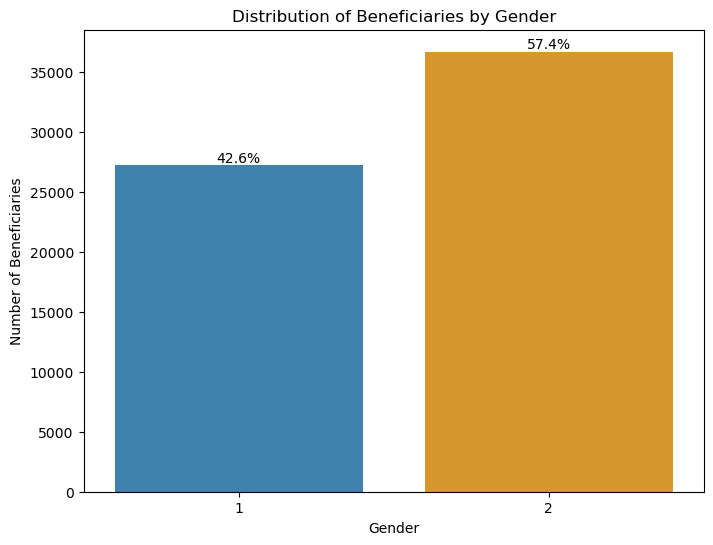

In [10]:
# create the plot
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=test_beneficiary, x='Gender', 
                  palette=['#2E86C1', '#F39C12'])

# Calculate percentages
total = len(test_beneficiary)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Beneficiaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Beneficiaries')
plt.show()

#### Beneficiaries by Year of Birth.

##### DOB column is object, we have to convert it into datetime type in order to manipulate it.

In [11]:
# simple conversion (since it's in standard ISO format)
test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'])

# verify the conversion
print("New data type:", test_beneficiary['DOB'].dtype)

# display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOB'].head())

New data type: datetime64[ns]

First few dates after conversion:
0   1943-01-01
1   1940-09-01
2   1936-07-01
3   1914-03-01
4   1938-04-01
Name: DOB, dtype: datetime64[ns]


In [12]:
test_beneficiary['Year'] = test_beneficiary['DOB'].dt.year
# group by year and count the number of beneficiaries
beneficiaries_by_year = test_beneficiary.groupby('Year').size().reset_index(name='Count')
beneficiaries_by_year.head()

,Year,Count
0,1909,361
1,1910,342
2,1911,337
3,1912,352
4,1913,356


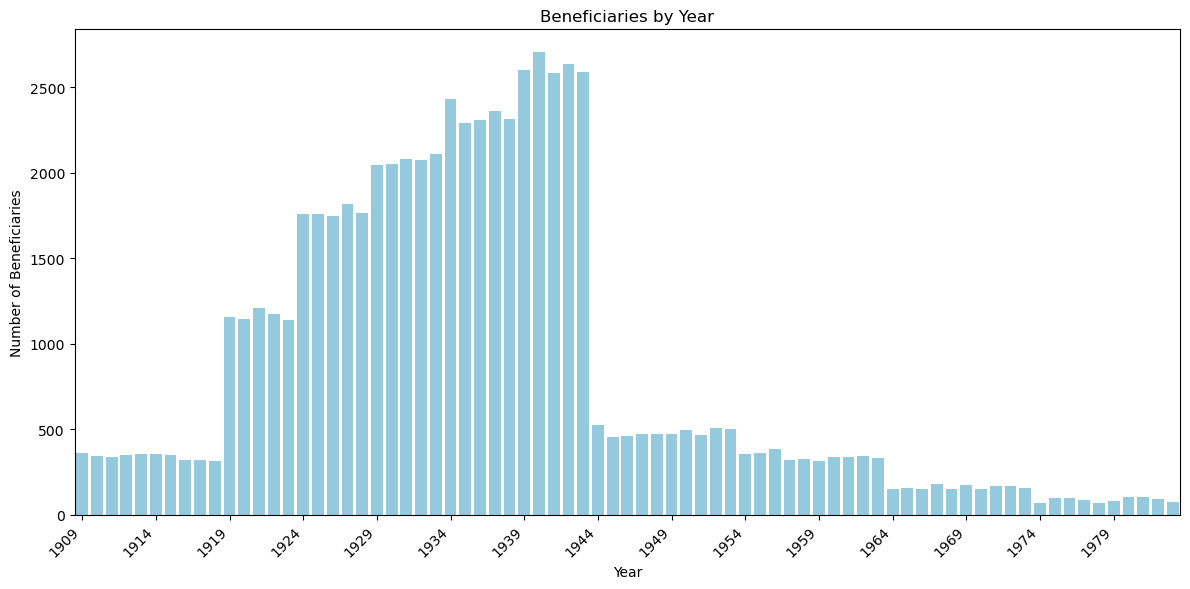

In [13]:
# create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=beneficiaries_by_year, color='skyblue')

# adjust x-axis to show every 5th year
xticks = beneficiaries_by_year['Year'][::5]
plt.xticks(ticks=range(0, len(beneficiaries_by_year), 5), labels=xticks, rotation=45, ha='right')

plt.xlabel('Year')
plt.ylabel('Number of Beneficiaries')
plt.title('Beneficiaries by Year')
plt.tight_layout()  # adjust layout to fit labels
plt.show()

##### Most of beneficiaries are born between 1919-1943.<br>
##### We can categorize beneficiaries by year in 6 groups:<br>
* 1. 1909-1918.<br>
* 2. 1919-1943.<br>
* 3. 1944-1953.<br>
* 4. 1954-1963.<br>
* 5. 1964-1973.<br>
* 6. 1974-1983.

In [14]:
# define the year ranges and corresponding group labels
bins = [1908, 1918, 1943, 1953, 1963, 1973, 1983]  # Bin edges
labels = ['1909-1918', '1919-1943', '1944-1953', '1954-1963', '1964-1973', '1974-1983']  # bin labels

# create a new column for the year groups
beneficiaries_by_year['Year_Category'] = pd.cut(beneficiaries_by_year['Year'], bins=bins, labels=labels, right=True)

# group by the year groups and count the number of beneficiaries
beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()
# calculate the total number of beneficiaries
total_beneficiaries = beneficiaries_by_category['Count'].sum()
# display the result
beneficiaries_by_category

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/2574626991.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()


,Year_Category,Count
0,1909-1918,3411
1,1919-1943,49849
2,1944-1953,4825
3,1954-1963,3411
4,1964-1973,1600
5,1974-1983,872


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/186935316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')


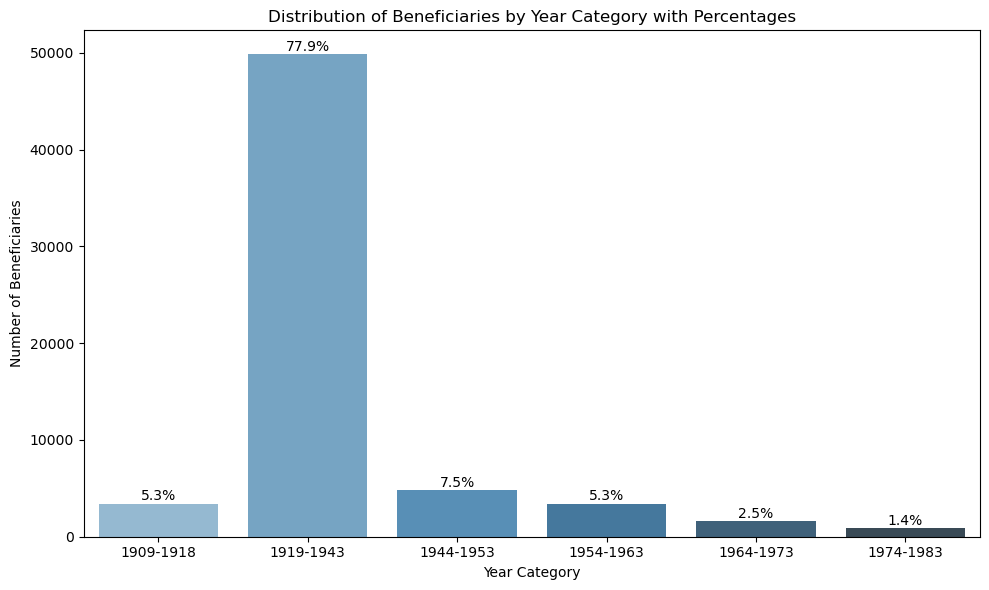

In [15]:
# calculate the percentage for each category
beneficiaries_by_category['Percentage'] = (beneficiaries_by_category['Count'] / total_beneficiaries) * 100

# plotting the distribution by categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')

# adding percentages on top of each bar
for index, row in beneficiaries_by_category.iterrows():
    plt.text(index, row['Count'] + 50, f'{row["Percentage"]:.1f}%', ha='center', va='bottom')

# adding labels and title
plt.xlabel('Year Category')
plt.ylabel('Number of Beneficiaries')
plt.title('Distribution of Beneficiaries by Year Category with Percentages')

# display the plot
plt.tight_layout()
plt.show()

#### Deceased beneficiaries.

##### Let's check the column of DOD.

In [16]:
# simple conversion (since it's in standard ISO format)
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'])

# verify the conversion
print("New data type:", test_beneficiary['DOD'].dtype)

# display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOD'].head())

New data type: datetime64[ns]

First few dates after conversion:
0          NaT
1   2009-12-01
2          NaT
3          NaT
4          NaT
Name: DOD, dtype: datetime64[ns]


In [17]:
test_beneficiary['DOD'].unique()

<DatetimeArray>
[                'NaT', '2009-12-01 00:00:00', '2009-09-01 00:00:00',
 '2009-05-01 00:00:00', '2009-08-01 00:00:00', '2009-10-01 00:00:00',
 '2009-06-01 00:00:00', '2009-07-01 00:00:00', '2009-02-01 00:00:00',
 '2009-04-01 00:00:00', '2009-11-01 00:00:00', '2009-03-01 00:00:00',
 '2009-01-01 00:00:00']
Length: 13, dtype: datetime64[ns]

##### There are only dead dates for year 2009.

##### Let's investigate the rows of patients who are dead.

In [18]:
# calculate the age by subtracting DOB from DOD and getting the difference in years
test_beneficiary['Age_at_death'] = (test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days / 365.25

# round the age to the nearest integer
test_beneficiary['Age_at_death'] = test_beneficiary['Age_at_death'].round()

# check the distribution of ages, you can use:
print(test_beneficiary['Age_at_death'].describe())


count    574.000000
mean      74.412892
std       11.110672
min       37.000000
25%       68.000000
50%       75.000000
75%       82.000000
max      100.000000
Name: Age_at_death, dtype: float64


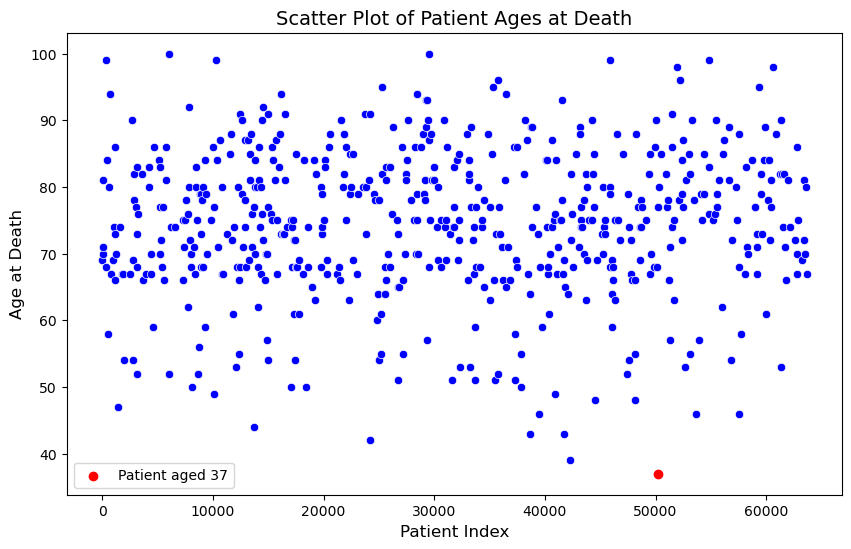

In [19]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['Age_at_death'], color='blue')

# highlight the patient who died at the age of 37
patient_37 = test_beneficiary[test_beneficiary['Age_at_death'] == 37]
plt.scatter(patient_37.index, patient_37['Age_at_death'], color='red', label='Patient aged 37')

# title and labels
plt.title('Scatter Plot of Patient Ages at Death', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Age at Death', fontsize=12)

# show the legend
plt.legend()

# display the plot
plt.show()

##### We can conclude that the minimum age of death is not an outlier, also there is no specific pattern of ages through the patients, the ages are distributed uniformly from the minimum to the maximum.

##### Average death age is 74 years old amongst 574 patients. Date of death only for 2009. Missing data for any other years.

#### Beneficiaries by Race.

In [20]:
# group by race and count the number of beneficiaries
beneficiaries_by_race = test_beneficiary.groupby('Race').size().reset_index(name='Count')
beneficiaries_by_race.head()

,Race,Count
0,1,54105
1,2,6384
2,3,2147
3,5,1332


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/2064551336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=beneficiaries_by_race, x='Race', y='Count',


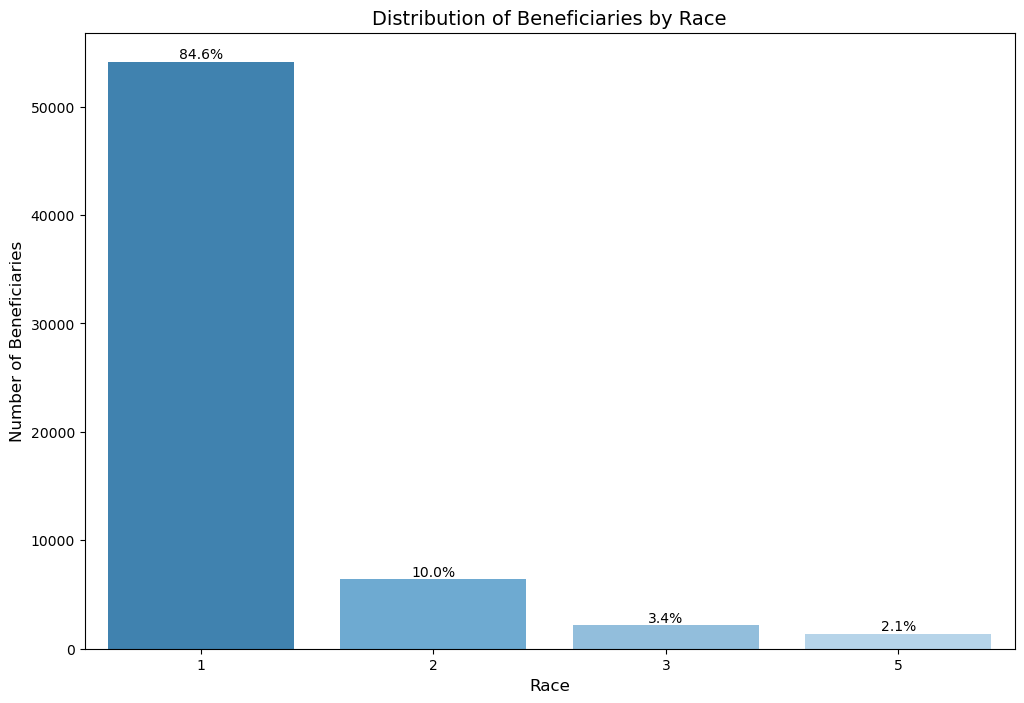

In [21]:
# create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=beneficiaries_by_race, x='Race', y='Count', 
                 palette=['#2E86C1', '#5DADE2', '#85C1E9', '#AED6F1'])

# calculate the percentage for each category
beneficiaries_by_race['Percentage'] = (beneficiaries_by_race['Count'] / total_beneficiaries) * 100

# adding percentages on top of each bar
for index, row in beneficiaries_by_race.iterrows():
    plt.text(index, row['Count'] + 50, f'{row["Percentage"]:.1f}%', ha='center', va='bottom')

# add title and labels
plt.title('Distribution of Beneficiaries by Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Beneficiaries', fontsize=12)

# show the plot
plt.show()



#### Beneficiearies by State.

In [22]:
# group by state and count the number of beneficiaries
beneficiaries_by_state = test_beneficiary.groupby('State').size().reset_index(name='Count')
print(beneficiaries_by_state.head())

   State  Count
0      1   1459
1      2    107
2      3    951
3      4    529
4      5   3812


##### There are 54 States in this Dataset.

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/4071237926.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues')  # choose a gradient colormap
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/4071237926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/4071237926.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


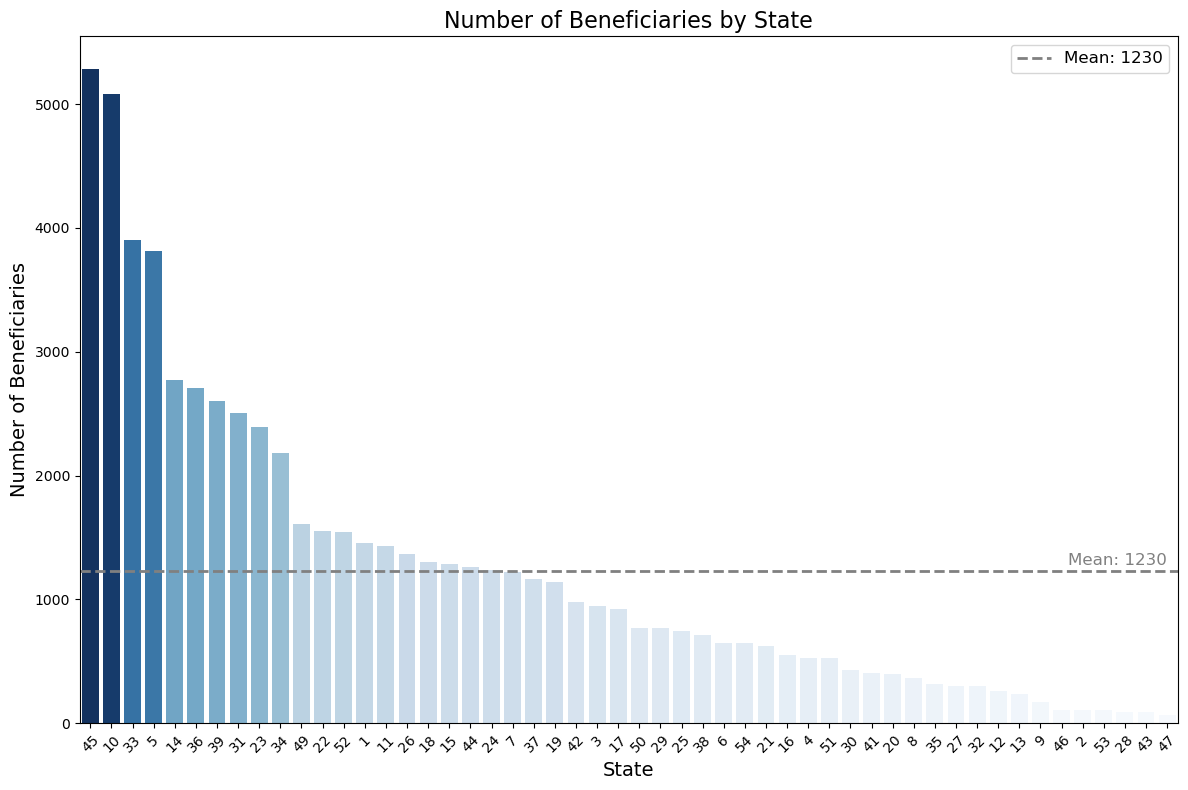

In [23]:
plt.figure(figsize=(12, 8))

# sort the data in descending order by 'Count'
beneficiaries_by_state_sorted = beneficiaries_by_state.sort_values(by='Count', ascending=False)

# normalize the counts to create a gradient effect
normalized_counts = beneficiaries_by_state_sorted['Count'] / beneficiaries_by_state_sorted['Count'].max()

# use a colormap to generate colors based on normalized counts
colormap = cm.get_cmap('Blues')  # choose a gradient colormap
colors = colormap(normalized_counts)

# create the bar plot with explicit order for the x-axis
ax = sns.barplot(
    data=beneficiaries_by_state_sorted,
    x='State',
    y='Count',
    palette=colors,
    order=beneficiaries_by_state_sorted['State']
)

# calculate total number of beneficiaries and mean
total_beneficiaries = beneficiaries_by_state_sorted['Count'].sum()
mean_beneficiaries = beneficiaries_by_state_sorted['Count'].mean()

# add an average line
plt.axhline(mean_beneficiaries, color='grey', linestyle='--', linewidth=2, label=f'Mean: {mean_beneficiaries:.0f}')

# annotate the value of the mean on the line
plt.text(
    x=len(beneficiaries_by_state_sorted) - 1,  # position near the end of the x-axis
    y=mean_beneficiaries + 50,  # slightly above the line for visibility
    s=f'Mean: {mean_beneficiaries:.0f}', 
    color='grey',
    fontsize=12,
    ha='right'
)

# set plot title and labels
plt.title('Number of Beneficiaries by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Beneficiaries', fontsize=14)

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add legend for the average line
plt.legend(loc='upper right', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

In [24]:
beneficiaries_by_state.describe()

,State,Count
count,52.000000,52.000000
mean,26.865385,1230.153846
std,15.668163,1217.936384
min,1.000000,66.000000
25%,13.750000,390.250000
50%,26.500000,848.500000
75%,39.500000,1480.500000
max,54.000000,5283.000000


#### Beneficiaries by County.

In [25]:
# group by county and count the number of beneficiaries
beneficiaries_by_county = test_beneficiary.groupby('County').size().reset_index(name='Count')
print(beneficiaries_by_county.head())

   County  Count
0       0   1447
1       1      1
2      10   1710
3      11     10
4      14      1


In [26]:
beneficiaries_by_county.describe()

,County,Count
count,285.000000,285.000000
mean,609.238596,224.449123
std,295.477662,373.731830
min,0.000000,1.000000
25%,360.000000,5.000000
50%,670.000000,17.000000
75%,874.000000,323.000000
max,999.000000,1710.000000


##### There are 999 Counties in this Dataset.

##### I'am interested in analyzing more populous counties, to focus on larger data that can provide more meaningful trends.
##### I am going to filter counties with ≥323 beneficiaries, as they are part of the top 25% of counties by population of beneficiaries.

In [27]:
# filter counties where the count of beneficiaries is >= 323
filtered_beneficiaries_by_county = beneficiaries_by_county[beneficiaries_by_county['Count'] >= 323]

print(filtered_beneficiaries_by_county.head())

   County  Count
0       0   1447
2      10   1710
5      20   1577
7      30    822
9      40   1262


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/2148990995.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues')  # choose a gradient colormap
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/2148990995.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_19899/2148990995.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


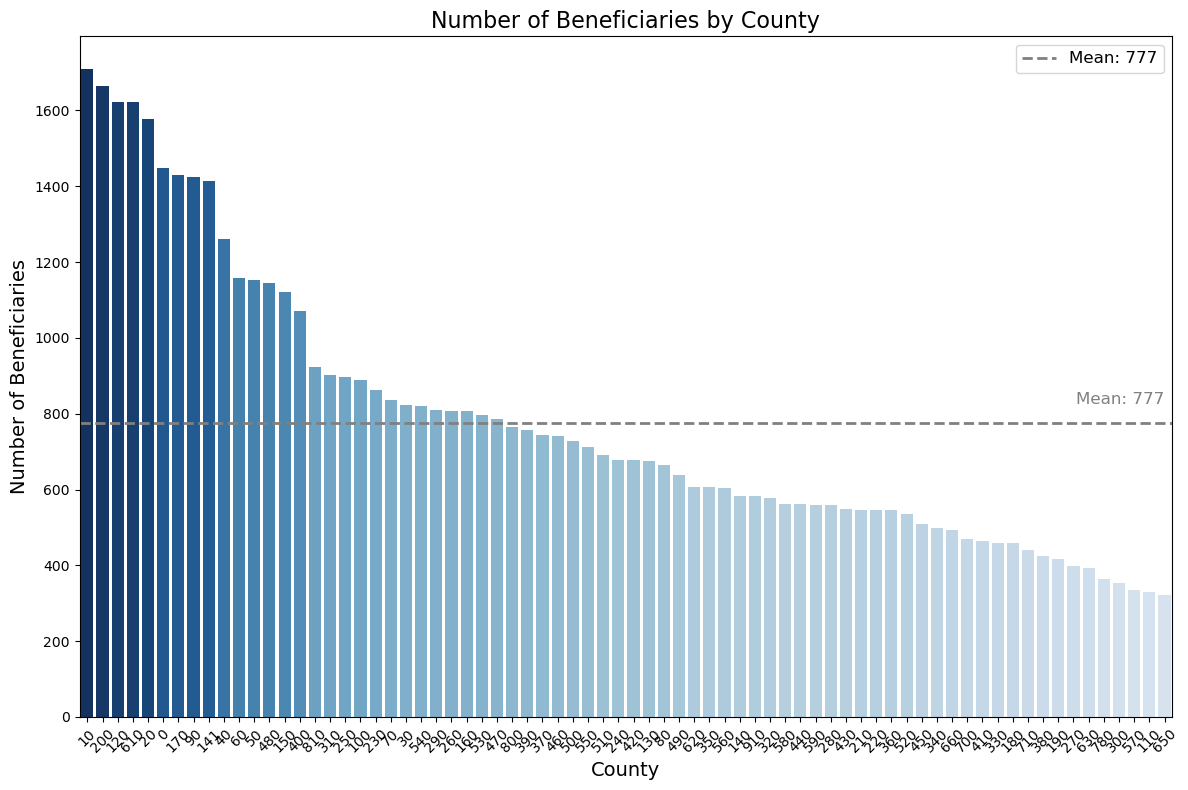

In [28]:
plt.figure(figsize=(12, 8))

# sort the data in descending order by 'Count'
beneficiaries_by_county_sorted = filtered_beneficiaries_by_county.sort_values(by='Count', ascending=False)

# normalize the counts to create a gradient effect
normalized_counts = beneficiaries_by_county_sorted['Count'] / beneficiaries_by_county_sorted['Count'].max()

# use a colormap to generate colors based on normalized counts
colormap = cm.get_cmap('Blues')  # choose a gradient colormap
colors = colormap(normalized_counts)

# create the bar plot with explicit order for the x-axis
ax = sns.barplot(
    data=beneficiaries_by_county_sorted,
    x='County',
    y='Count',
    palette=colors,
    order=beneficiaries_by_county_sorted['County']
)

# calculate total number of beneficiaries and mean
total_beneficiaries = beneficiaries_by_county_sorted['Count'].sum()
mean_beneficiaries = beneficiaries_by_county_sorted['Count'].mean()

# add an average line
plt.axhline(mean_beneficiaries, color='grey', linestyle='--', linewidth=2, label=f'Mean: {mean_beneficiaries:.0f}')

# annotate the value of the mean on the line
plt.text(
    x=len(beneficiaries_by_county_sorted) - 1,  # position near the end of the x-axis
    y=mean_beneficiaries + 50,  # slightly above the line for visibility
    s=f'Mean: {mean_beneficiaries:.0f}', 
    color='grey',
    fontsize=12,
    ha='right'
)

# set plot title and labels
plt.title('Number of Beneficiaries by County', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Beneficiaries', fontsize=14)

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add legend for the average line
plt.legend(loc='upper right', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

##### Beneficiaries by Chronic Condition.

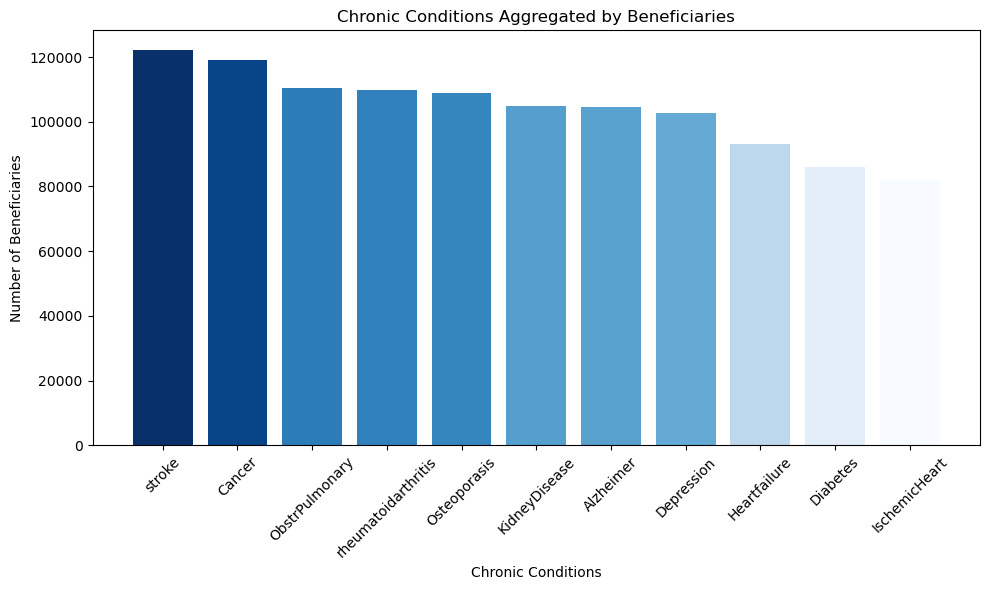

In [29]:
# aggregate by summing each chronic condition
aggregated_data = test_beneficiary[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                                    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']].sum()

# sort the aggregated data in descending order
aggregated_data_sorted = aggregated_data.sort_values(ascending=False)

# create a bar plot with a gradient of blues (from dark to light)
plt.figure(figsize=(10, 6))

# generate a colormap of blues with a gradient from dark to light
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=min(aggregated_data_sorted.values), vmax=max(aggregated_data_sorted.values))
colors = [cmap(norm(value)) for value in aggregated_data_sorted.values]

bars = plt.bar(aggregated_data_sorted.index, aggregated_data_sorted.values, color=colors)

# renaming x-axis labels by removing 'ChronicCond_' prefix
new_labels = [label.replace('ChronicCond_', '') for label in aggregated_data_sorted.index]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)

# adding labels and title
plt.xlabel('Chronic Conditions')
plt.ylabel('Number of Beneficiaries')
plt.title('Chronic Conditions Aggregated by Beneficiaries')

plt.tight_layout()

# show the plot
plt.show()

***

##### Annual reinbursement for IP and OP beneficiaries analysis.

In [30]:
# check statistics to investigate the existence of outliers for IP Patients.
test_beneficiary['IPAnnualReimbursementAmt'].describe()

count     63968.000000
mean       4557.559561
std       10741.954472
min       -1000.000000
25%           0.000000
50%           0.000000
75%        5000.000000
max      155600.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [31]:
# check statistics to investigate the existence of outliers for OP Patients.
test_beneficiary['OPAnnualReimbursementAmt'].describe()

count    63968.000000
mean      1664.710324
std       3010.045357
min        -60.000000
25%        290.000000
50%        800.000000
75%       1960.000000
max      97510.000000
Name: OPAnnualReimbursementAmt, dtype: float64

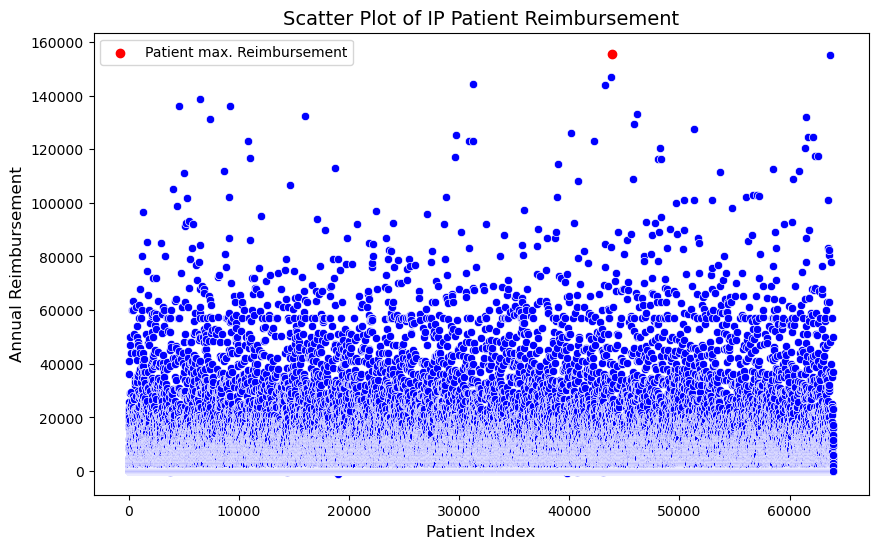

In [32]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['IPAnnualReimbursementAmt'], color='blue')

# highlight the patient who died at the age of 37
patient_155600 = test_beneficiary[test_beneficiary['IPAnnualReimbursementAmt'] == 155600]
plt.scatter(patient_155600.index, patient_155600['IPAnnualReimbursementAmt'], color='red', label='Patient max. Reimbursement')

# title and labels
plt.title('Scatter Plot of IP Patient Reimbursement', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Annual Reimbursement', fontsize=12)

# show the legend
plt.legend()

# display the plot
plt.show()

##### In the scatter plot provided, the x-axis represents the patient index, and the y-axis shows the annual reimbursements to patients. The data points are predominantly clustered in the lower region of the y-axis, suggesting that most patients have relatively low reimbursements, with a general trend of reimbursements between 20,000 and 60,000.<br>

##### 🚩 However, there is a clear outlier in the data, marked with a red dot, which represents a patient with an unusually high reimbursement—around 150,000. This stands out significantly from the rest of the data points, which are much lower. Such outliers could be indicative of potential fraud or errors in the system.<br>

##### The majority of the patients show typical reimbursement amounts, forming a dense cluster. This suggests that the insurance reimbursement process is functioning within expected limits for most cases.<br>

##### 🚩 The red dot, indicating the patient with the highest reimbursement, may warrant further investigation. If this reimbursement is legitimate, there could be valid reasons, such as exceptional medical treatments or conditions. However, if this is an anomaly, it could signal a fraudulent claim or an error that needs correction.<br>

##### 🚩 Fraud Risk: Large outliers in reimbursement amounts often attract attention in fraud detection systems.

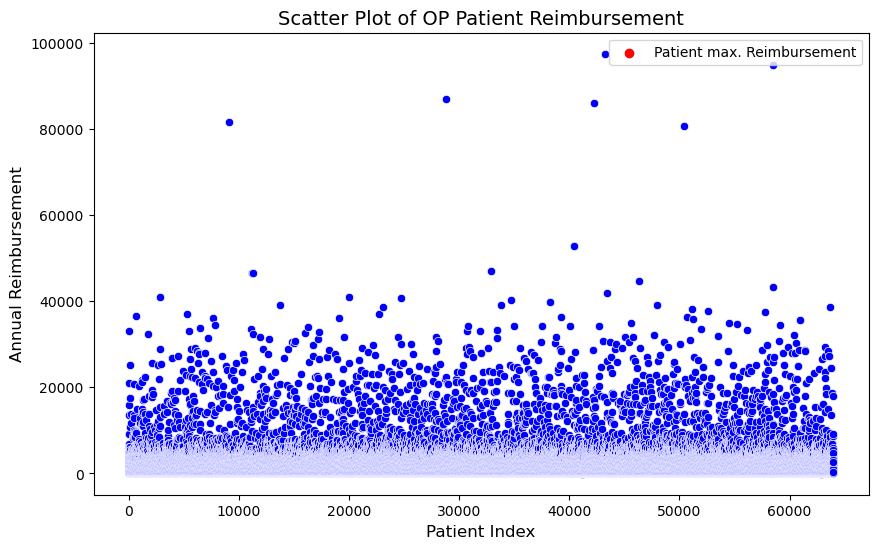

In [33]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['OPAnnualReimbursementAmt'], color='blue')

# highlight the patient who died at the age of 37
patient_155600 = test_beneficiary[test_beneficiary['OPAnnualReimbursementAmt'] == 155600]
plt.scatter(patient_155600.index, patient_155600['OPAnnualReimbursementAmt'], color='red', label='Patient max. Reimbursement')

# title and labels
plt.title('Scatter Plot of OP Patient Reimbursement', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Annual Reimbursement', fontsize=12)

# show the legend
plt.legend()

# display the plot
plt.show()

##### In this scatter plot for outpatient (OP) patient reimbursements, the x-axis represents the patient index, and the y-axis shows the annual reimbursements. The majority of the data points fall in the lower range of the y-axis, indicating that most outpatient reimbursements are relatively modest.<br>

##### 🚩 However, there are some high-value outliers scattered across the plot, with a particularly notable outlier represented by the red dot, which corresponds to the patient with the highest reimbursement. This point stands out significantly from the rest of the data.



##### 🚩 Conclusion: We can see some pattern outside the average behavior of patients on reimbursements received which may indicate fraud movements.

##### Both OP and IP Patients have negative amounts. For the purpose of the analysis we will clean the dataset not taking into consideration the negative values with a clean dataset.

In [34]:
# filter IP beneficiaries with negative reimbursement amounts
IP_negative_reimbursements = test_beneficiary[test_beneficiary['IPAnnualReimbursementAmt'] < 0]

# count the number of IP beneficiaries with negative reimbursements
IP_count_negative_reimbursements = IP_negative_reimbursements['BeneID'].nunique()

print(f"Number of IP beneficiaries with negative reimbursements: {IP_count_negative_reimbursements}")

Number of IP beneficiaries with negative reimbursements: 9


In [35]:
IP_negative_reimbursements

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Year,Age_at_death
3752,BENE19571,1938-07-01,NaT,2,1,0,32,230,12,12,...,1,2,2,2,-300,1068,4720,770,1938,NaN
7051,BENE27231,1935-02-01,NaT,1,1,0,42,250,12,12,...,1,1,2,2,-100,1068,1220,770,1935,NaN
14343,BENE44298,1929-02-01,NaT,2,2,0,1,510,12,12,...,1,2,2,2,-300,1068,2430,200,1929,NaN
18972,BENE54894,1926-04-01,NaT,2,1,0,14,141,12,12,...,2,2,2,2,-1000,1068,100,10,1926,NaN
32276,BENE85807,1972-12-01,NaT,1,1,0,44,60,12,12,...,1,2,2,2,-40,1068,170,110,1972,NaN
39800,BENE103244,1925-10-01,NaT,2,1,0,5,370,12,12,...,2,1,2,2,-800,1068,90,0,1925,NaN
39941,BENE103563,1934-07-01,NaT,1,1,0,45,810,12,12,...,1,1,2,2,-10,1068,480,200,1934,NaN
40656,BENE105279,1931-11-01,NaT,2,1,0,34,800,12,12,...,2,2,2,2,-200,1068,1420,840,1931,NaN
43065,BENE110853,1913-06-01,NaT,2,3,0,5,650,12,12,...,1,2,2,2,-200,1068,420,100,1913,NaN


In [36]:
# filter OP beneficiaries with negative reimbursement amounts
OP_negative_reimbursements = test_beneficiary[test_beneficiary['OPAnnualReimbursementAmt'] < 0]

# count the number of OP beneficiaries with negative reimbursements
OP_count_negative_reimbursements = OP_negative_reimbursements['BeneID'].nunique()

print(f"Number of OP beneficiaries with negative reimbursements: {OP_count_negative_reimbursements}")

Number of OP beneficiaries with negative reimbursements: 2


In [37]:
OP_negative_reimbursements

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Year,Age_at_death
41108,BENE106343,1929-06-01,NaT,1,1,Y,50,50,12,12,...,1,1,2,2,25000,3204,-60,10,1929,NaN
62866,BENE156652,1914-03-01,NaT,1,1,0,21,150,12,12,...,1,2,2,2,3000,1068,-50,20,1914,NaN


In [38]:
# check if there are beneficiaries on both datasets.
common_beneficiaries = set(OP_negative_reimbursements['BeneID']) & set(IP_negative_reimbursements['BeneID'])
print(f"Therer are {len(common_beneficiaries)} beneficiaries in both datasets{', '.join(map(str, common_beneficiaries))}.")


Therer are 0 beneficiaries in both datasets.


##### Clean the test_beneficiary dataset removing the negative amounts from the reimbursements and saving the clean dataset.

In [39]:
# filter out rows with negative values in the specified columns
cleaned_test_beneficiary = test_beneficiary[
    (test_beneficiary['IPAnnualReimbursementAmt'] >= 0) & 
    (test_beneficiary['OPAnnualReimbursementAmt'] >= 0)
]

# save the cleaned DataFrame to a new CSV file
cleaned_test_beneficiary.to_csv("cleaned_test_beneficiary.csv", index=False)

In [40]:
# check to see if it is clean of the negative values.
cleaned_test_beneficiary['IPAnnualReimbursementAmt'].describe()

count     63957.000000
mean       4557.951749
std       10742.415308
min           0.000000
25%           0.000000
50%           0.000000
75%        5000.000000
max      155600.000000
Name: IPAnnualReimbursementAmt, dtype: float64

##### Next are same steps but for the Out Patient dataset.

In [41]:
# check if the data set is clean of negative values.
cleaned_test_beneficiary['OPAnnualReimbursementAmt'].describe()

count    63957.000000
mean      1664.825586
std       3010.236134
min          0.000000
25%        290.000000
50%        800.000000
75%       1960.000000
max      97510.000000
Name: OPAnnualReimbursementAmt, dtype: float64

***

#### Patients who were admitted in the hospital.

In [42]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [44]:
test_inpatient['InscClaimAmtReimbursed'].describe()

count      9551.000000
mean      10105.306251
std       10316.862711
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [45]:
# checking for duplicates on claims column.
# display duplicated claims in the column.
print(f"There are {test_inpatient['ClaimID'].duplicated().sum()} duplicate Claims.")

There are 0 duplicate Claims.


In [46]:
# check unique Providers.
print(f"There are {len(test_inpatient.Provider.unique())} unique providers.")

There are 520 unique providers.


In [47]:
# join both tables on BeneID
merged_df = pd.merge(test_beneficiary, test_inpatient, on='BeneID', how='inner')

# ensure the DOD and ClaimsStartDt columns are in datetime format
merged_df['DOD'] = pd.to_datetime(merged_df['DOD'], errors='coerce')
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'], errors='coerce')
merged_df['ClaimEndDt'] = pd.to_datetime(merged_df['ClaimEndDt'], errors='coerce')
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'], errors='coerce')
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'], errors='coerce')

# filter beneficiaries where ClaimsStartDt is later than DOD
claims_after_dod = merged_df[merged_df['ClaimStartDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = claims_after_dod['BeneID'].nunique()  # count unique beneficiaries
num_claims = claims_after_dod.shape[0]  # total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who filed {num_claims} claims after they were deceased.")

There are 0 beneficiaries who filed 0 claims after they were deceased.


#### There are no Beneficiaries who filed claims after they died.

In [48]:
ended_claims_after_dod = merged_df[merged_df['ClaimEndDt'] > merged_df['DOD']]

num_beneficiaries = ended_claims_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who ended their claims after they were deceased.")

There are 0 beneficiaries who ended their claims after they were deceased.


#### There are no Beneficiaries who ended their claims after they died.

In [49]:
admissions_after_dod = merged_df[merged_df['AdmissionDt'] > merged_df['DOD']]

num_beneficiaries = admissions_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who were admitted after they were deceased.")

There are 0 beneficiaries who were admitted after they were deceased.


#### There are no Beneficiaries who were admitted after they died.

In [50]:
discharged_after_dod = merged_df[merged_df['DischargeDt'] > merged_df['DOD']]

num_beneficiaries = discharged_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who were discharged after they were deceased.")

There are 0 beneficiaries who were discharged after they were deceased.


#### There are no Beneficiaries who were discharged after they died.

In [51]:
# filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0)]

# count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement: 253


In [52]:
# filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['DeductibleAmtPaid'] == 0)]

# count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# print the result
print(f"Number of beneficiaries who received a service but paid 0 deductible amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but paid 0 deductible amount for the service: 0


In [53]:
# filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0) & (test_inpatient['DeductibleAmtPaid'] == 0)]

# count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: 0


In [54]:
# filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0) & (test_inpatient['DeductibleAmtPaid'] > 0)]

# count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: 247


##### Group Beneficiaries by Diagnosis Group Code.

In [55]:
# group by 'ClmAdmitDiagnosisCode' and count the number of unique 'BeneID' for each diagnosis code
in_grouped_by_diagnosis = test_inpatient.groupby('DiagnosisGroupCode')['BeneID'].nunique().reset_index(name='BeneficiaryCount')

# print the result
in_grouped_by_diagnosis.describe()

,BeneficiaryCount
count,712.000000
mean,13.403090
std,10.131159
min,1.000000
25%,6.000000
50%,11.000000
75%,18.000000
max,51.000000


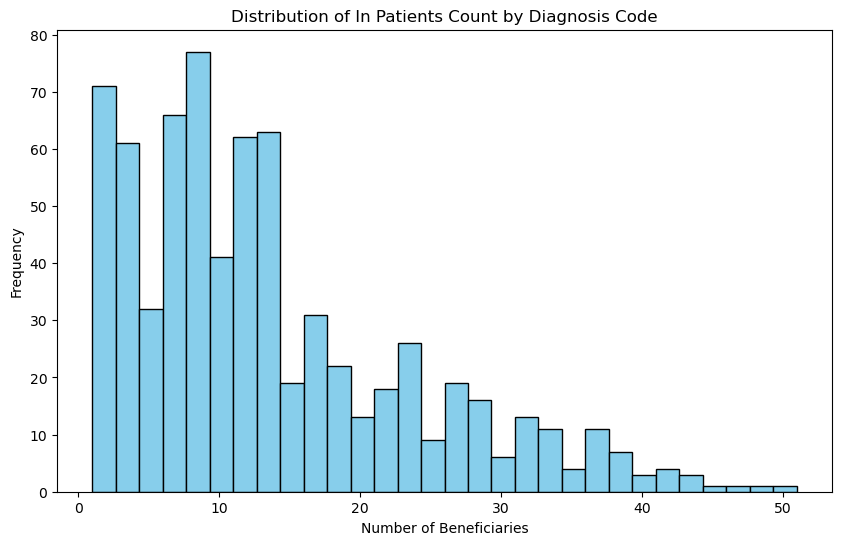

In [56]:
# plot a histogram of the BeneficiaryCount
plt.figure(figsize=(10, 6))
plt.hist(in_grouped_by_diagnosis['BeneficiaryCount'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of In Patients Count by Diagnosis Code')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.show()

##### This histogram shows the distribution of inpatients grouped by diagnosis group code. The x-axis represents the number of beneficiaries (in patients) within each diagnosis group code, while the y-axis shows the frequency or count of diagnosis group codes that fall into a particular range of beneficiaries.<br>

##### Most diagnosis group codes have relatively few beneficiaries, with the count of beneficiaries typically ranging from 0 to 10. This suggests that certain diagnosis codes are associated with a smaller group of patients.<br>

##### There is a gradual decline in frequency as the number of beneficiaries increases, with a small number of diagnosis codes having a higher count of patients. The distribution exhibits a long tail to the right, indicating that a few diagnosis codes are associated with a significantly larger number of patients.<br>

##### The distribution reflects a typical pattern in healthcare, where most conditions affect a small number of patients, but a few common diagnoses represent the majority of cases. 

In [57]:
# group by 'ClmAdmitDiagnosisCode' and count the number of unique 'BeneID' for each diagnosis code
out_grouped_by_diagnosis = test_outpatient.groupby('ClmAdmitDiagnosisCode')['BeneID'].nunique().reset_index(name='BeneficiaryCount')

# print the result
out_grouped_by_diagnosis.describe()

,BeneficiaryCount
count,2303.000000
mean,11.115502
std,43.359123
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,981.000000


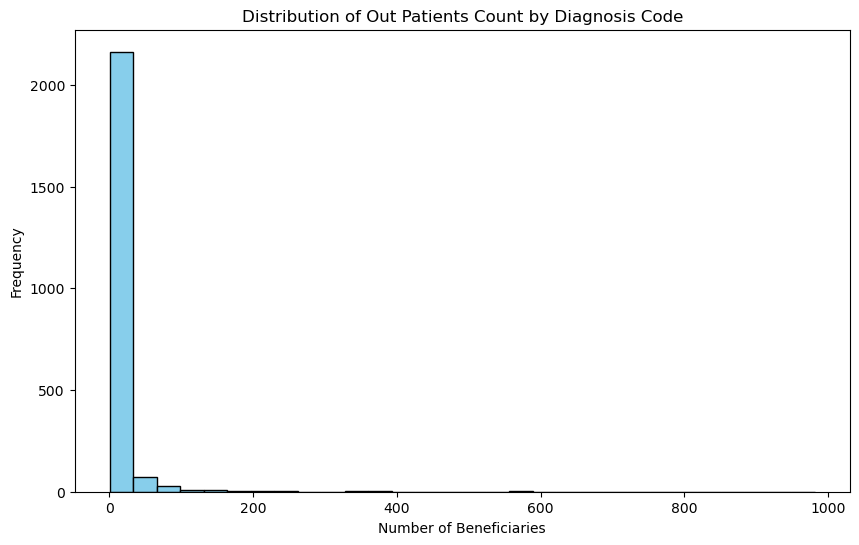

In [58]:
# plot a histogram of the BeneficiaryCount
plt.figure(figsize=(10, 6))
plt.hist(out_grouped_by_diagnosis['BeneficiaryCount'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Out Patients Count by Diagnosis Code')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.show()

##### The plot presents the distribution of outpatients based on the number of beneficiaries associated with each diagnosis code. The data reveals a highly skewed distribution, with a significant number of diagnosis codes having a relatively low number of beneficiaries.<br>

##### The majority of diagnosis codes have a small number of associated beneficiaries. This suggests that a few diagnosis codes are responsible for a large portion of the outpatient visits.<br>

##### The distribution has a long tail, indicating that there are a few diagnosis codes with a very high number of beneficiaries. These codes likely represent common or severe conditions.<br>

##### 🚩 The presence of very high values in the tail of the distribution might indicate outliers or anomalies in the data. It's essential to investigate these cases further to ensure data quality and accuracy.

##### Correlation Matrix for In Patients.

##### To show correlation coefficients between variables. It helps visualize the strength and direction of linear relationships between pairs of variables. This can be useful for feature selection, identifying redundant variables, and understanding the underlying structure of data.

In [59]:
# step 1: remove irrelevant columns
columns_to_remove = ['ClaimID', 'BeneID', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt']
cleaned_data = test_inpatient.drop(columns=columns_to_remove)

In [60]:
# step 2: remove columns with too many missing values or columns that don't add value to the correlation
# Removing columns with a high percentage of missing values (e.g., procedure codes with more than 90% missing)
cleaned_data = cleaned_data.dropna(thresh=0.1*len(cleaned_data), axis=1)

In [61]:
# step 3: check if any columns are of object type (in case some non-numeric columns exist) 
columns_to_convert = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[columns_to_convert] = cleaned_data[columns_to_convert].notna().astype(int)

In [62]:
# step 4: calculate the correlation matrix
correlation_matrix = cleaned_data.corr()

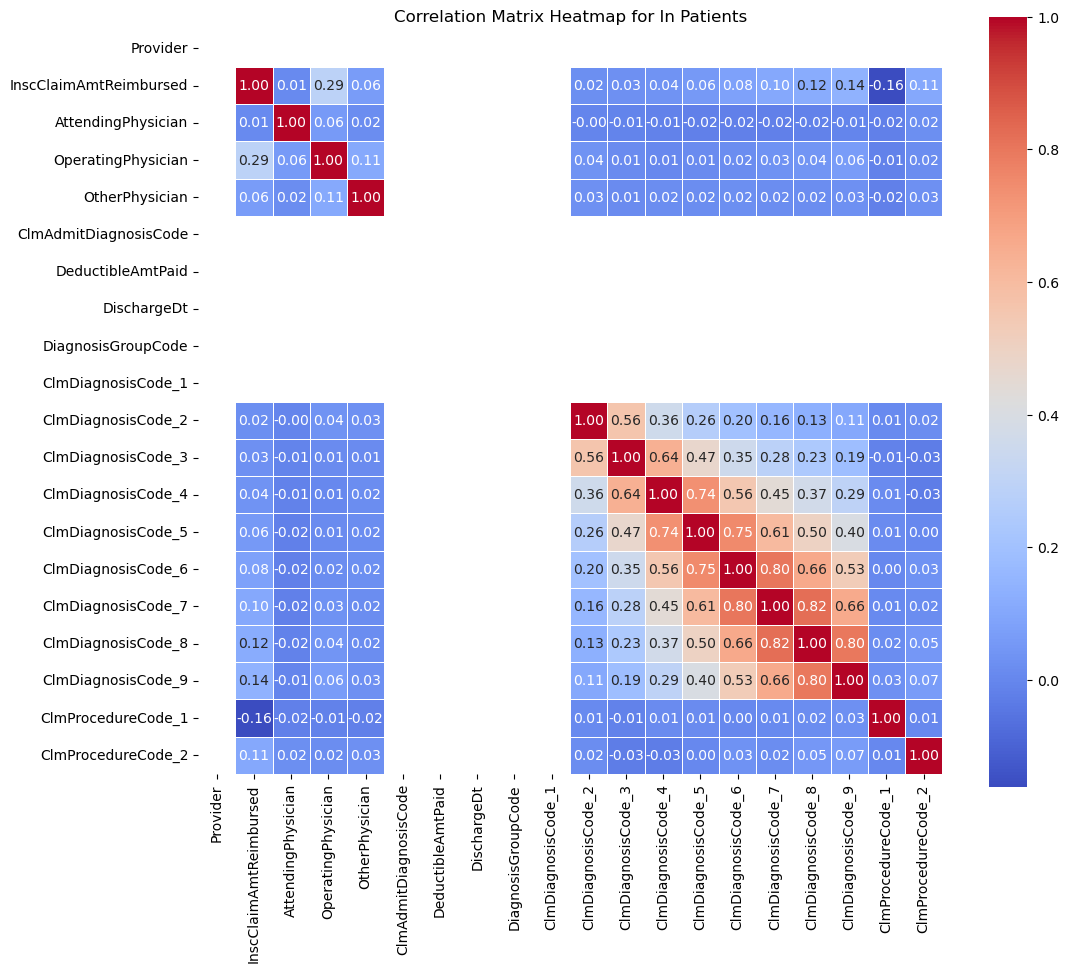

In [63]:
# step 5: plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# step 6: display the heatmap
plt.title('Correlation Matrix Heatmap for In Patients')
plt.show()

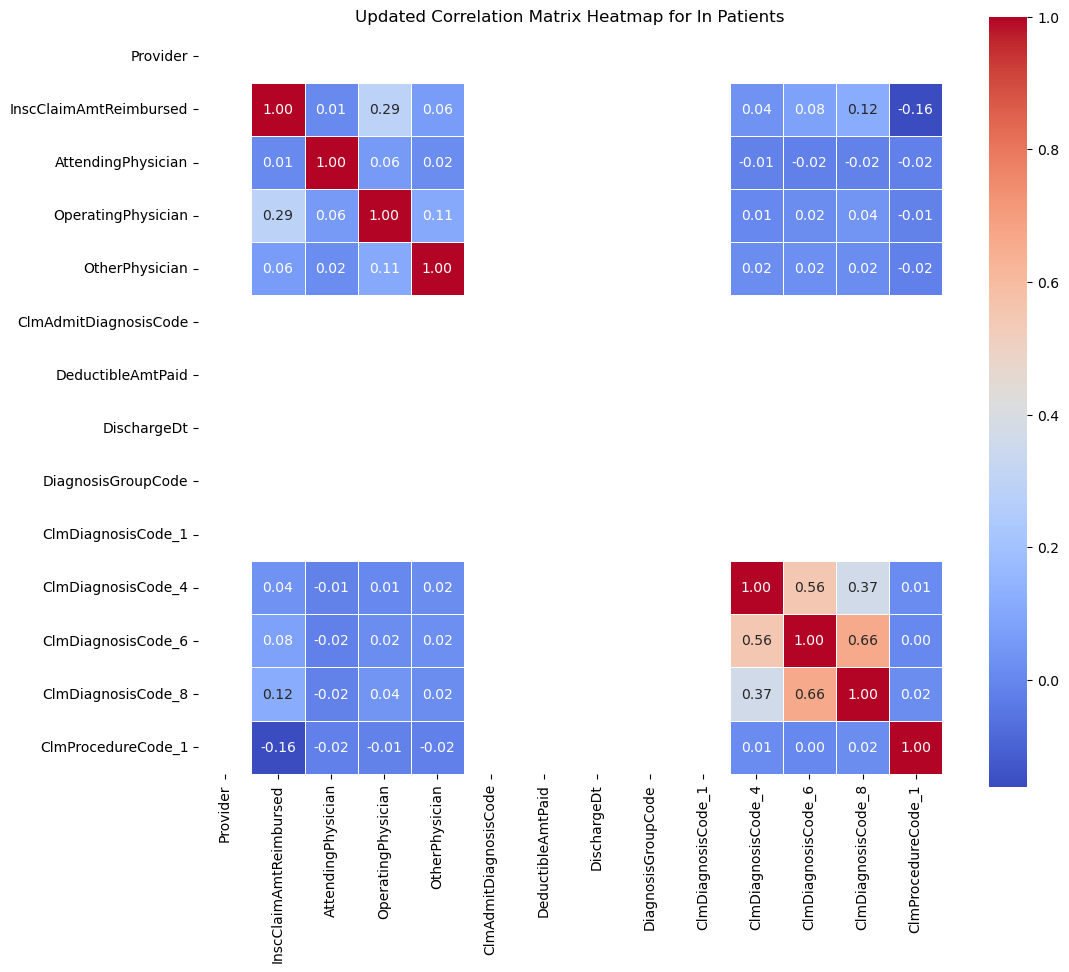

In [64]:
# drop highly correlated columns
columns_to_drop = [
    'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_5',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_2'
]

# dropping the identified columns
cleaned_inpatient_data = cleaned_data.drop(columns=columns_to_drop)

# recalculate the correlation matrix
correlation_matrix = cleaned_inpatient_data.corr()

# plot the updated heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title('Updated Correlation Matrix Heatmap for In Patients')
plt.show()


##### InscClaimAmtReimbursed has a strong positive correlation with ClmDiagnosisCode_4, ClmDiagnosisCode_6, and ClmDiagnosisCode_8. This suggests that higher reimbursement amounts are associated with these specific diagnosis codes.<br>

##### ClmDiagnosisCode_4, ClmDiagnosisCode_6, and ClmDiagnosisCode_8 are highly correlated with each other, indicating that these diagnosis codes often occur together.<br>

##### InscClaimAmtReimbursed has a weak negative correlation with ClmProcedureCode_1. This could suggest that certain procedures might be less expensive or reimbursed at lower rates.<br>

##### AttendingPhysician and OperatingPhysician have a negative correlation with OtherPhysician, indicating that the presence of one might be inversely related to the presence of others.

***

#### Patients who visited the hospital but were not admited in the hospital.

In [65]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [66]:
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125841 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  125841 non-null  object 
 1   ClaimID                 125841 non-null  object 
 2   ClaimStartDt            125841 non-null  object 
 3   ClaimEndDt              125841 non-null  object 
 4   Provider                125841 non-null  object 
 5   InscClaimAmtReimbursed  125841 non-null  int64  
 6   AttendingPhysician      125525 non-null  object 
 7   OperatingPhysician      21604 non-null   object 
 8   OtherPhysician          47619 non-null   object 
 9   ClmDiagnosisCode_1      123263 non-null  object 
 10  ClmDiagnosisCode_2      78110 non-null   object 
 11  ClmDiagnosisCode_3      49266 non-null   object 
 12  ClmDiagnosisCode_4      30470 non-null   object 
 13  ClmDiagnosisCode_5      17966 non-null   object 
 14  ClmDiagnosisCode_6  

In [67]:
# ensure the Claims, Admission and Discharge columns are in datetime format
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'], errors='coerce')
merged_df['ClaimEndDt'] = pd.to_datetime(merged_df['ClaimEndDt'], errors='coerce')
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'], errors='coerce')
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'], errors='coerce')

In [68]:
# checking for duplicates on claims column.
# display duplicated claims in the column.
print(f"There are {test_outpatient['ClaimID'].duplicated().sum()} duplicate Claims.")

There are 0 duplicate Claims.


##### I will check if there are Beneficiaries who were deceased and reported to visit hospital after DOD.

In [69]:
# filter beneficiaries where ClaimsStartDt is later than DOD
claims_after_dod = merged_df[merged_df['ClaimStartDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = claims_after_dod['BeneID'].nunique()  # count unique beneficiaries
num_claims = claims_after_dod.shape[0]  # total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who filed {num_claims} claims after they were deceased.")

There are 0 beneficiaries who filed 0 claims after they were deceased.


In [70]:
# filter beneficiaries where ClaimEndDt is later than DOD
ended_claims_after_dod = merged_df[merged_df['ClaimEndDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = ended_claims_after_dod['BeneID'].nunique()  # count unique beneficiaries
num_claims = ended_claims_after_dod.shape[0]  # total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who ended {num_claims} claims after they were deceased.")

There are 0 beneficiaries who ended 0 claims after they were deceased.


##### There are no beneficiaries who filed and ended a claim after they were deceased.

In [71]:
# filter for claims with dates later than the date of death
claims_after_death = merged_df[
    (merged_df['ClaimStartDt'] > merged_df['DOD']) | 
    (merged_df['ClaimEndDt'] > merged_df['DOD'])
]

# count the unique providers
providers_with_late_claims = claims_after_death['Provider'].nunique()

# print the result
print(f"There are {providers_with_late_claims} providers who had Beneficiaries who sent a claim after they were deceased.")

There are 0 providers who had Beneficiaries who sent a claim after they were deceased.


In [72]:
# count the unique attending physicians
attending_physicians_with_late_claims = claims_after_death['AttendingPhysician'].nunique()

# print the result
print(f"There are {attending_physicians_with_late_claims} attending physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 attending physicians who had Beneficiaries who sent a claim after they were deceased.


In [73]:
# count the unique providers
operating_physicians_with_late_claims = claims_after_death['OperatingPhysician'].nunique()

# print the result
print(f"There are {operating_physicians_with_late_claims} operating physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 operating physicians who had Beneficiaries who sent a claim after they were deceased.


In [74]:
# count the unique providers
other_physicians_with_late_claims = claims_after_death['OtherPhysician'].nunique()

# print the result
print(f"There are {other_physicians_with_late_claims} other physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 other physicians who had Beneficiaries who sent a claim after they were deceased.


##### Correlation Matrix for Out Patients.

In [75]:
# step 1: remove irrelevant columns
# based on the dataset provided, we will remove non-relevant columns
columns_to_remove = ['ClaimID', 'BeneID', 'ClaimStartDt', 'ClaimEndDt']  # remove non-relevant columns
cleaned_outpatient_data = test_outpatient.drop(columns=columns_to_remove)

In [76]:
# step 2: remove columns with too many missing values or columns that don't add value to the correlation
# remove columns with more than 90% missing data (procedure codes and diagnosis codes with many missing values)
cleaned_outpatient_data = cleaned_outpatient_data.dropna(thresh=0.1 * len(cleaned_outpatient_data), axis=1)

In [77]:
# step 3: convert object columns to boolean (1 for presence, 0 for absence)
columns_to_convert = cleaned_outpatient_data.select_dtypes(include=['object']).columns
cleaned_outpatient_data[columns_to_convert] = cleaned_outpatient_data[columns_to_convert].notna().astype(int)

In [78]:
# step 4: calculate the correlation matrix
correlation_matrix_outpatient = cleaned_outpatient_data.corr()

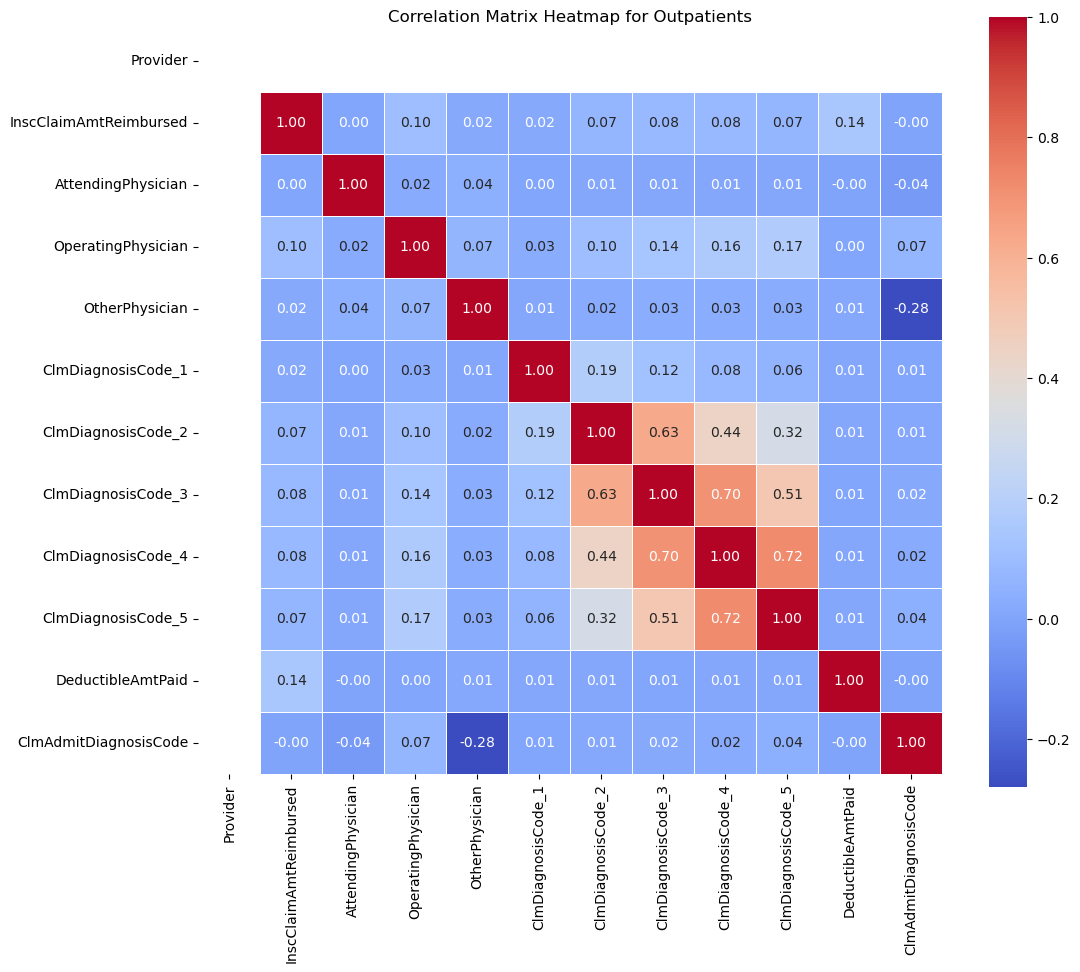

In [79]:
# step 5: plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix_outpatient, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# step 6: display the heatmap
plt.title('Correlation Matrix Heatmap for Outpatients')
plt.show()

In [80]:
# step 4: drop highly correlated columns based on the correlation matrix
# drop ClmDiagnosisCode_1, ClmDiagnosisCode_3, and ClmDiagnosisCode_5 as discussed
columns_to_drop = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_5']
cleaned_outpatient_data = cleaned_outpatient_data.drop(columns=columns_to_drop)

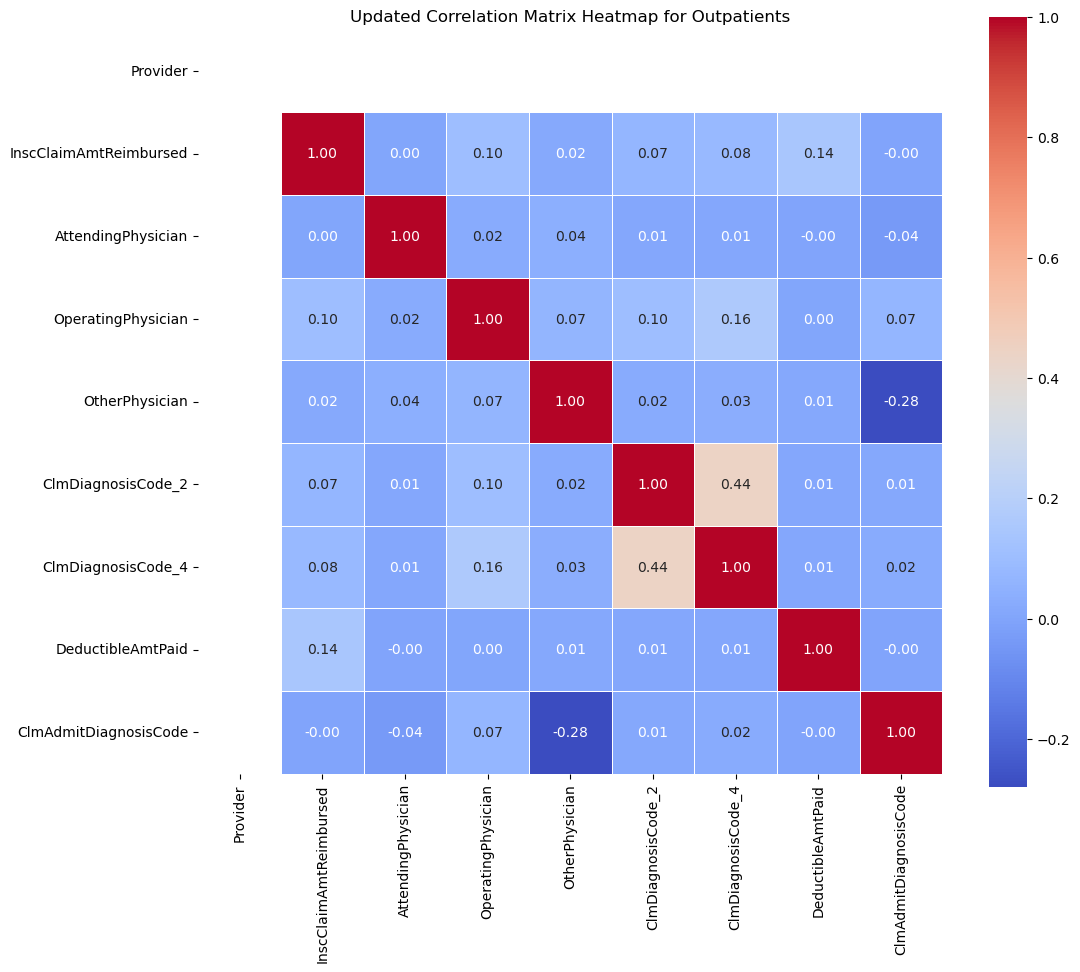

In [81]:
# step 5: calculate the correlation matrix
correlation_matrix_outpatient = cleaned_outpatient_data.corr()

# step 6: plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix_outpatient, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# step 7: display the heatmap
plt.title('Updated Correlation Matrix Heatmap for Outpatients')
plt.show()

##### InscClaimAmtReimbursed has a stronger positive correlation with ClmDiagnosisCode_2 and ClmDiagnosisCode_4 compared to the inpatient matrix. This suggests that these diagnosis codes are more strongly associated with higher reimbursement amounts for outpatient claims.<br>

##### ClmDiagnosisCode_2 and ClmDiagnosisCode_4 also have a stronger correlation with each other, indicating a closer relationship between these diagnoses in outpatient settings.<br>

##### The correlations between the different physician variables (AttendingPhysician, OperatingPhysician, and OtherPhysician) are generally weaker in the outpatient matrix. This might suggest that the roles of these physicians are less distinct in outpatient settings compared to inpatient care.<br>

##### ClmDiagnosisCode_2 has a negative correlation with OtherPhysician. This could indicate that certain diagnosis codes are less likely to involve multiple physicians in outpatient settings.

***

##### Save the clean data sets for in & out patients.

In [82]:
# save the cleaned inpatient dataset
cleaned_inpatient_data.to_csv('cleaned_inpatient_data.csv', index=False)

# save the cleaned outpatient dataset
cleaned_outpatient_data.to_csv('cleaned_outpatient_data.csv', index=False)


***

##### IP Deductible amounts vs Reimbursed amounts for IP & OP.

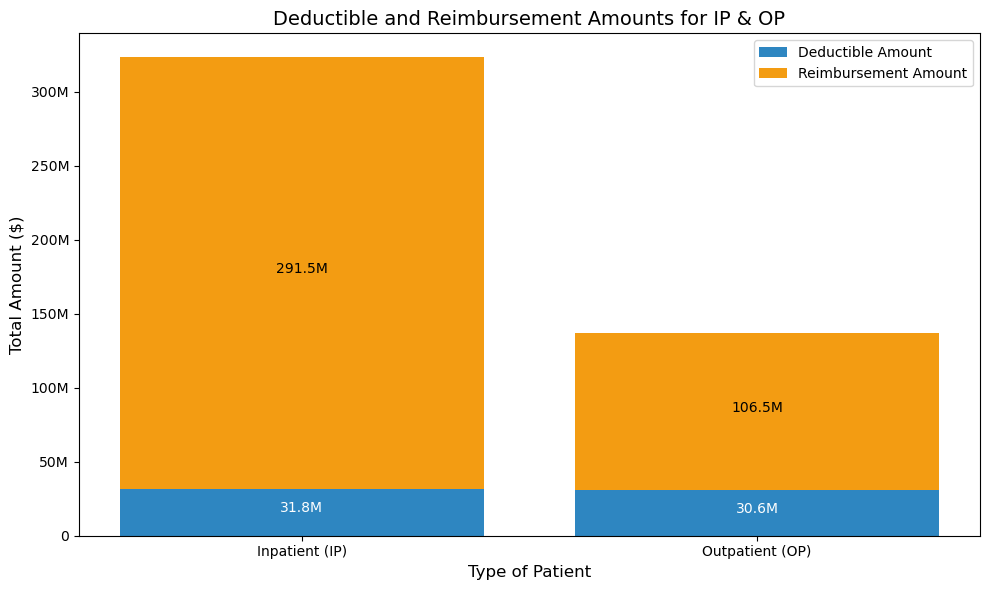

In [83]:
# function to format the y-axis labels
def format_y_axis(value, _):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# aggregate the data for IP
ip_total_deductible = test_beneficiary['IPAnnualDeductibleAmt'].sum()
ip_total_reimbursement = test_beneficiary['IPAnnualReimbursementAmt'].sum()

# aggregate the data for OP
op_total_deductible = test_beneficiary['OPAnnualDeductibleAmt'].sum()
op_total_reimbursement = test_beneficiary['OPAnnualReimbursementAmt'].sum()

# create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Inpatient (IP)', 'Outpatient (OP)'],
    'Deductible Amount': [ip_total_deductible, op_total_deductible],
    'Reimbursement Amount': [ip_total_reimbursement, op_total_reimbursement]
})

# plotting
plt.figure(figsize=(10, 6))

# stacked bar chart
plt.bar(plot_data['Category'], plot_data['Deductible Amount'], label='Deductible Amount', color='#2E86C1')
plt.bar(plot_data['Category'], plot_data['Reimbursement Amount'], 
        bottom=plot_data['Deductible Amount'], label='Reimbursement Amount', color='#F39C12')

# add labels and title
plt.xlabel('Type of Patient', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.title('Deductible and Reimbursement Amounts for IP & OP', fontsize=14)

# format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
plt.ylabel('Total Amount ($)', fontsize=12)

# add a legend
plt.legend()

# display values on the bars
for idx, row in plot_data.iterrows():
    total = row['Deductible Amount'] + row['Reimbursement Amount']
    plt.text(idx, row['Deductible Amount'] / 2, f'{row["Deductible Amount"] / 1e6:.1f}M', ha='center', color='white', fontsize=10)
    plt.text(idx, row['Deductible Amount'] + (row['Reimbursement Amount'] / 2), f'{row["Reimbursement Amount"] / 1e6:.1f}M', ha='center', color='black', fontsize=10)

# improve layout
plt.tight_layout()

# show plot
plt.show()

##### 🚩 Reimbursement Amounts Dominate: For both inpatient and outpatient services, the reimbursement amounts significantly exceed the deductible amounts. This indicates that a substantial portion of the healthcare costs is covered by insurance or other reimbursement mechanisms.<br>

##### Inpatient Costs Higher: The total amounts (deductible + reimbursement) for inpatient services are substantially higher than for outpatient services. This aligns with the general understanding that inpatient care involves more complex procedures, longer hospital stays, and higher associated costs.<br>

##### Similar Deductible Patterns: The deductible amounts for both inpatient and outpatient services are relatively similar, suggesting a consistent approach to cost-sharing for different types of care.

***

#### Creating the Model for prediction.

##### We need to first create the FraudActivity column, which will indicate whether a provider's activity is fraudulent or not.

##### Create a threshold that will evaluate if there is fraud activity or not.

In [84]:
# set a threshold for claim amount (you can adjust this threshold based on your data)
claim_amount_threshold = cleaned_inpatient_data['InscClaimAmtReimbursed'].quantile(0.95)  # 95th percentile

# set a threshold for number of claims per provider
provider_claims_threshold = cleaned_inpatient_data.groupby('Provider').size().quantile(0.95)

# create a FraudActivity column based on these rules
cleaned_inpatient_data['FraudActivity'] = np.where(
    (cleaned_inpatient_data['InscClaimAmtReimbursed'] > claim_amount_threshold) |
    (cleaned_inpatient_data.groupby('Provider')['Provider'].transform('size') > provider_claims_threshold),
    1, 0
)

# verify that the column was created
cleaned_inpatient_data[['Provider', 'InscClaimAmtReimbursed', 'FraudActivity']].head()

,Provider,InscClaimAmtReimbursed,FraudActivity
0,1,9000,0
1,1,14000,0
2,1,2000,0
3,1,16000,0
4,1,19000,0


In [85]:
# set a threshold for claim amount (you can adjust this threshold based on your data)
claim_amount_threshold_outpatient = cleaned_outpatient_data['InscClaimAmtReimbursed'].quantile(0.30)  # 30th percentile

# set a threshold for number of claims per provider
provider_claims_threshold_outpatient = cleaned_outpatient_data.groupby('Provider').size().quantile(0.30)

# create a FraudActivity column based on these rules
cleaned_outpatient_data['FraudActivity'] = np.where(
    (cleaned_outpatient_data['InscClaimAmtReimbursed'] > claim_amount_threshold_outpatient) |
    (cleaned_outpatient_data.groupby('Provider')['Provider'].transform('size') > provider_claims_threshold_outpatient),
    1, 0
)

# verify that the column was created
cleaned_outpatient_data[['Provider', 'InscClaimAmtReimbursed', 'FraudActivity']].head()

,Provider,InscClaimAmtReimbursed,FraudActivity
0,1,30,0
1,1,30,0
2,1,200,1
3,1,10,0
4,1,10,0


##### Split the source data into training set, validations set and test set.<br>
##### 60% training dataset.<br>
##### 20% validating dataset.<br>
##### 20% test dataset.

In [86]:
# define features (X) and target (y)
X_inpatient = cleaned_inpatient_data.drop(columns=['FraudActivity'])  # drop target column from features
y_inpatient = cleaned_inpatient_data['FraudActivity']  # target is fraud activity

# split the data into 60% training, 20% validation, and 20% testing
X_train_inpatient, X_temp_inpatient, y_train_inpatient, y_temp_inpatient = train_test_split(X_inpatient, y_inpatient, test_size=0.4, random_state=42)  # 60% for training
X_val_inpatient, X_test_inpatient, y_val_inpatient, y_test_inpatient = train_test_split(X_temp_inpatient, y_temp_inpatient, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Get feature names
feature_names_inpatient = X_train_inpatient.columns

In [87]:
# define features (X) and target (y) for the outpatient data
X_outpatient = cleaned_outpatient_data.drop(columns=['FraudActivity'])  # drop target column from features
y_outpatient = cleaned_outpatient_data['FraudActivity']  # target is fraud activity

# split the data into 60% training, 20% validation, and 20% testing
X_train_outpatient, X_temp_outpatient, y_train_outpatient, y_temp_outpatient = train_test_split(X_outpatient, y_outpatient, test_size=0.4, random_state=42)  # 60% for training
X_val_outpatient, X_test_outpatient, y_val_outpatient, y_test_outpatient = train_test_split(X_temp_outpatient, y_temp_outpatient, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Get feature names
feature_names_outpatient = X_train_outpatient.columns

##### Initialize and Train the RandomForestClassifier.

In [88]:
# initialize RandomForestClassifier model
rf_model_inpatient = RandomForestClassifier(random_state=42)

# fit the model with training data
rf_model_inpatient.fit(X_train_inpatient, y_train_inpatient)

RandomForestClassifier(random_state=42)

In [89]:
# initialize RandomForestClassifier model
rf_model_outpatient = RandomForestClassifier(random_state=42)

# fit the model with the training data
rf_model_outpatient.fit(X_train_outpatient, y_train_outpatient)

RandomForestClassifier(random_state=42)

##### Evaluate the Model.

In [90]:
# make predictions on the validation set
y_val_pred_inpatient = rf_model_inpatient.predict(X_val_inpatient)

In [91]:
# make predictions on the validation set
y_val_pred_outpatient = rf_model_outpatient.predict(X_val_outpatient)

***

##### Reshaping the sets so they have a match for the model to perform.

In [92]:
# check shapes for both sets and we see they don't match.
print(f"Length of y_pred_outpatient: {len(y_val_pred_outpatient)}")
print(f"Length of X_test_outpatient: {X_test_outpatient.shape[0]}")

Length of y_pred_outpatient: 25168
Length of X_test_outpatient: 25169


In [93]:
X_test_outpatient_1 = X_test_outpatient[:-1]  # remove the last sample from y_test_outpatient

In [94]:
y_test_outpatient_1 = y_test_outpatient[:-1]

In [95]:
# now we see they both match.
print(f"Length of y_pred_outpatient: {len(y_val_pred_outpatient)}")
print(f"Length of X_test_outpatient: {y_test_outpatient_1.shape[0]}")

Length of y_pred_outpatient: 25168
Length of X_test_outpatient: 25168


In [96]:
print(f"Length of y_pred_outpatient: {len(y_val_pred_outpatient)}")
print(f"Length of X_test_outpatient: {X_test_outpatient_1.shape[0]}")


Length of y_pred_outpatient: 25168
Length of X_test_outpatient: 25168


***

##### Saving the Model.

In [97]:
# save the trained model to a file
joblib.dump(rf_model_inpatient, 'fraud_detection_model_inpatient.pkl')

['fraud_detection_model_inpatient.pkl']

In [98]:
# save the trained outpatient model to a file
joblib.dump(rf_model_outpatient, 'fraud_detection_model_outpatient.pkl')

['fraud_detection_model_outpatient.pkl']

***

#### Metrics.

##### Confusion Matrix.

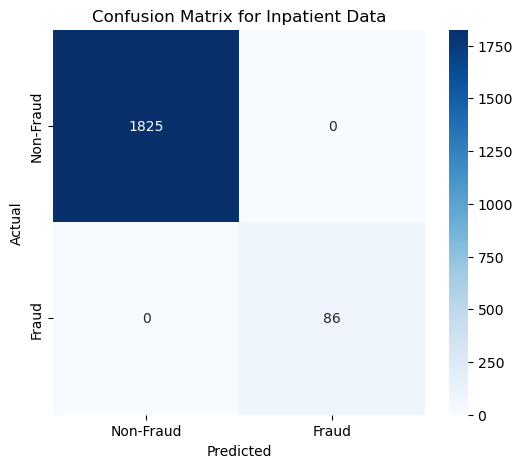

In [99]:
# predicting on inpatient data
y_pred_inpatient = rf_model_inpatient.predict(X_test_inpatient)

# confusion Matrix for inpatient data
cm_inpatient = confusion_matrix(y_test_inpatient, y_pred_inpatient)

# plot the confusion matrix for inpatient
plt.figure(figsize=(6, 5))
sns.heatmap(cm_inpatient, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Inpatient Data')
plt.show()

##### Interpretation of the Current Matrix:<br>

* True Positives (TP): 1825 cases were correctly identified as non-fraudulent.
* True Negatives (TN): 86 cases were correctly identified as fraudulent.
* False Positives (FP): 0 cases were incorrectly identified as fraudulent (Type I error).
* False Negatives (FN): 0 cases were incorrectly identified as non-fraudulent (Type II error).
* The model has demonstrated high accuracy in classifying both non-fraudulent and fraudulent cases.
* The absence of False Positives indicates that the model is very good at avoiding false alarms, which is crucial in fraud detection to minimize unnecessary investigations.

X_test_outpatient shape: (25168, 9)
y_test_outpatient shape: (25168,)
y_val_pred_outpatient shape: 25168


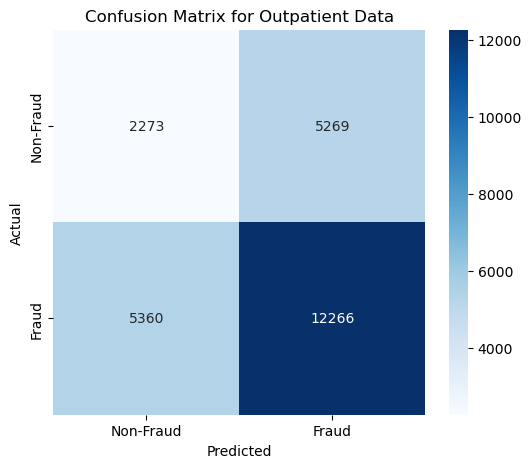

In [100]:
# check if the shapes are correct
print("X_test_outpatient shape:", X_test_outpatient_1.shape)
print("y_test_outpatient shape:", y_test_outpatient_1.shape)
print("y_val_pred_outpatient shape:", len(y_val_pred_outpatient))

# ensure that y_test_outpatient and y_val_pred_outpatient have the same number of samples
assert len(y_test_outpatient_1) == len(y_val_pred_outpatient), "The number of test labels and predictions do not match."

# generating the confusion matrix
cm_outpatient = confusion_matrix(y_test_outpatient_1, y_val_pred_outpatient)

# plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_outpatient, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Outpatient Data')
plt.show()

##### Interpretation of the Current Matrix:<br>

* True Positives (TP): 12266 cases were correctly identified as fraudulent. This indicates the model's ability to correctly identify actual fraudulent cases.
* True Negatives (TN): 2273 cases were correctly identified as non-fraudulent. This shows the model's accuracy in identifying legitimate claims.
* False Positives (FP): 5269 cases were incorrectly identified as fraudulent (Type I error). These are legitimate claims that the model mistakenly flagged as fraudulent.
* False Negatives (FN): 5360 cases were incorrectly identified as non-fraudulent (Type II error). These are fraudulent claims that the model failed to detect.

##### ROC Curve and AUC.

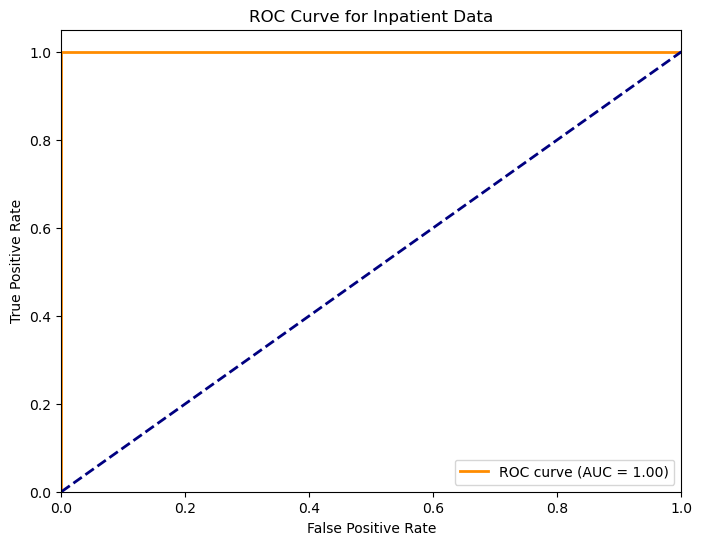

AUC: 1.00


In [101]:
# get the predicted probabilities for the positive class
y_pred_prob_inpatient = rf_model_inpatient.predict_proba(X_test_inpatient)[:, 1]  # probability of class 1 (Fraud)

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_inpatient, y_pred_prob_inpatient)

# compute AUC
roc_auc = auc(fpr, tpr)

# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Inpatient Data')
plt.legend(loc='lower right')
plt.show()

# print AUC score
print(f"AUC: {roc_auc:.2f}")


##### This image shows a Receiver Operating Characteristic (ROC) curve for inpatient data. The ROC curve is a plot of the true positive rate (also known as sensitivity) on the y-axis against the false positive rate (1 - specificity) on the x-axis for different decision thresholds of a binary classifier.

The dashed blue line represents the ROC curve, which shows the trade-off between the true positive rate and the false positive rate. The area under the ROC curve (AUC) is a commonly used metric to evaluate the performance of a binary classifier. 

The AUC value is displayed in the legend as 1.00, which indicates that the classifier has perfect discrimination (100% sensitivity and 100% specificity) between the positive and negative classes. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.

In this case, the ROC curve is a straight diagonal line from the bottom-left to the top-right corner, which is the characteristic of a perfect classifier. The AUC of 1.00 confirms that the classifier has excellent performance in distinguishing between the positive and negative classes for the inpatient data.

In [102]:
# Ensure that the test data has the same columns as the training data
# Reindex the test data based on the training data columns, and fill missing columns with 0
X_test_outpatient_1 = X_test_outpatient_1.reindex(columns=X_train_outpatient.columns, fill_value=0)

In [103]:
# Check the data types of the features in both training and test data
print(X_train_outpatient.dtypes)
print(X_test_outpatient_1.dtypes)


Provider                  int64
InscClaimAmtReimbursed    int64
AttendingPhysician        int64
OperatingPhysician        int64
OtherPhysician            int64
ClmDiagnosisCode_2        int64
ClmDiagnosisCode_4        int64
DeductibleAmtPaid         int64
ClmAdmitDiagnosisCode     int64
dtype: object
Provider                  int64
InscClaimAmtReimbursed    int64
AttendingPhysician        int64
OperatingPhysician        int64
OtherPhysician            int64
ClmDiagnosisCode_2        int64
ClmDiagnosisCode_4        int64
DeductibleAmtPaid         int64
ClmAdmitDiagnosisCode     int64
dtype: object


In [104]:
# Compare the unique values of each feature between train and test datasets
for column in X_train_outpatient.columns:
    train_values = X_train_outpatient[column].unique()
    test_values = X_test_outpatient_1[column].unique()
    
    if len(set(train_values) - set(test_values)) > 0:
        print(f"Feature '{column}' has different values between train and test.")


Feature 'InscClaimAmtReimbursed' has different values between train and test.


In [105]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_outpatient['InscClaimAmtReimbursed'] = scaler.fit_transform(X_train_outpatient[['InscClaimAmtReimbursed']])
X_test_outpatient_1['InscClaimAmtReimbursed'] = scaler.transform(X_test_outpatient_1[['InscClaimAmtReimbursed']])


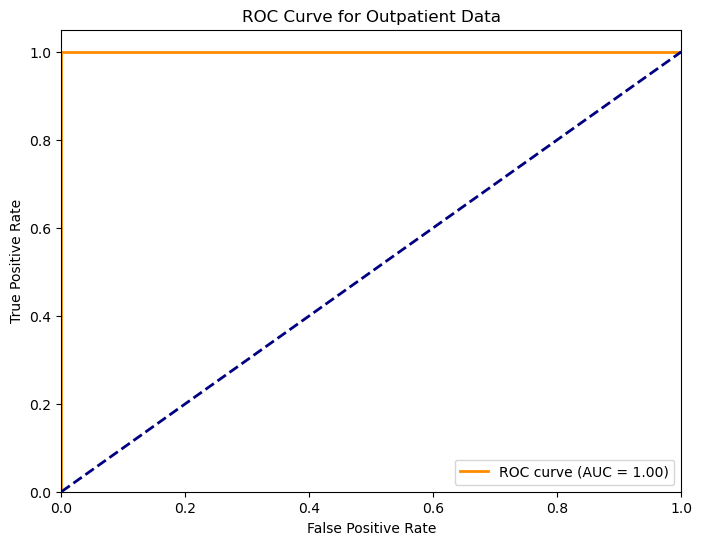

AUC: 1.00


In [106]:
# Fit the model again (if needed) using the training data
rf_model_outpatient.fit(X_train_outpatient, y_train_outpatient)

# Get predicted probabilities
y_pred_prob_outpatient = rf_model_outpatient.predict_proba(X_test_outpatient_1)[:, 1]  # Probability of class 1 (Fraud)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_outpatient_1, y_pred_prob_outpatient)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Outpatient Data')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC: {roc_auc:.2f}")

##### Compute Precision, Recall and F1 Score.

In [107]:
# Precision, Recall, and F1 Score for inpatient data
precision_inpatient = precision_score(y_test_inpatient, y_pred_inpatient)
recall_inpatient = recall_score(y_test_inpatient, y_pred_inpatient)
f1_inpatient = f1_score(y_test_inpatient, y_pred_inpatient)

# Precision, Recall, and F1 Score for outpatient data
precision_outpatient = precision_score(y_test_outpatient_1, y_val_pred_outpatient)
recall_outpatient = recall_score(y_test_outpatient_1, y_val_pred_outpatient)
f1_outpatient = f1_score(y_test_outpatient_1, y_val_pred_outpatient)

# print the metrics for inpatient data
print("Metrics for Inpatient Data:")
print(f"Precision: {precision_inpatient:.2f}")
print(f"Recall: {recall_inpatient:.2f}")
print(f"F1 Score: {f1_inpatient:.2f}")

# print the metrics for outpatient data
print("\nMetrics for Outpatient Data:")
print(f"Precision: {precision_outpatient:.2f}")
print(f"Recall: {recall_outpatient:.2f}")
print(f"F1 Score: {f1_outpatient:.2f}")

Metrics for Inpatient Data:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Metrics for Outpatient Data:
Precision: 0.70
Recall: 0.70
F1 Score: 0.70


##### Metrics for In Patients:

* The performance metrics for the RandomForestClassifier model indicate perfect classification results:<br>

* Accuracy: 1.0000: The model correctly predicted every instance in the dataset, achieving 100% accuracy. This suggests that the model has no errors in its predictions.<br>

* Precision: 1.0000: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 1.0000 means that every time the model predicted a positive class, it was correct.<br>

* Recall: 1.0000: Recall measures the proportion of actual positives correctly identified by the model. A recall of 1.0000 indicates that the model identified all true positives without missing any.<br>

* F1 Score: 1.0000: The F1 score is the harmonic mean of precision and recall. A value of 1.0000 means that both precision and recall are perfect, leading to an ideal balance between the two.<br>

##### Metrics for Out Patients:<br>
* Precision: 0.70: This means that 70% of the claims predicted as fraudulent are indeed fraudulent. This is a substantial improvement over previous thresholds and indicates a good reduction in false positives.<br>

* Recall: 0.70: This shows that the model is identifying 70% of the actual fraudulent claims. It's a solid recall rate, but there is still room to catch more fraudulent claims.<br>

* F1 Score: 0.70: This F1 score balances both precision and recall, and a score of 0.70 is generally very good, especially when dealing with imbalanced datasets, as in this case with fraudulent claims being much less frequent.

##### SHAP Values (Feature Importance) for In Patients.

In [108]:
# create a SHAP explainer for the model
explainer = shap.TreeExplainer(rf_model_inpatient)

In [109]:
# compute SHAP values for the test dataset
shap_values_inpatient = explainer.shap_values(X_test_inpatient)

In [110]:
print(f"Shape of SHAP values: {shap_values_inpatient[0].shape}")
print(f"Shape of X_test_inpatient: {X_test_inpatient.shape}")

Shape of SHAP values: (14, 2)
Shape of X_test_inpatient: (1911, 14)


In [111]:
shap_values_inpatient = shap_values_inpatient.T
print("Reshaped SHAP values shape:", shap_values_inpatient.shape) 

Reshaped SHAP values shape: (2, 14, 1911)


In [112]:
# calculate the SHAP metric
shap_metric_inpatient = np.mean(np.abs(shap_values_inpatient), axis=0)
print("SHAP metric:", shap_metric_inpatient)

SHAP metric: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.82235535e-02 5.94120753e-02 5.28371405e-02 ... 5.30959191e-02
  5.28278710e-02 9.30426487e-02]
 [3.98031767e-05 5.92996243e-05 4.51337413e-04 ... 4.51476682e-04
  4.51313110e-04 4.25653724e-05]
 ...
 [9.37554597e-04 3.03131583e-03 4.84850646e-04 ... 4.93578732e-04
  4.71719161e-04 1.33391719e-03]
 [3.46349108e-03 1.44897295e-02 2.23358764e-03 ... 2.24162470e-03
  2.04765629e-03 5.26227231e-03]
 [3.46282854e-02 5.99012324e-02 3.83989447e-03 ... 4.12563686e-03
  1.97629548e-03 4.16238942e-02]]


In [113]:
# aggregate SHAP values by taking the mean across samples
shap_metric_aggregated_inpatient = np.abs(shap_metric_inpatient).mean(axis=1)
print("Shape of aggregated shap_metric:", shap_metric_aggregated_inpatient.shape)


Shape of aggregated shap_metric: (14,)


In [114]:
# sort features by their aggregated importance
most_important_features_inpatient = feature_names_inpatient[np.argsort(-shap_metric_aggregated_inpatient)]
print("Most important features:")
for feature in most_important_features_inpatient:
    print(feature)

Most important features:
InscClaimAmtReimbursed
ClmProcedureCode_1
OperatingPhysician
ClmDiagnosisCode_8
ClmDiagnosisCode_6
OtherPhysician
ClmDiagnosisCode_4
AttendingPhysician
DischargeDt
DeductibleAmtPaid
ClmAdmitDiagnosisCode
Provider
DiagnosisGroupCode
ClmDiagnosisCode_1


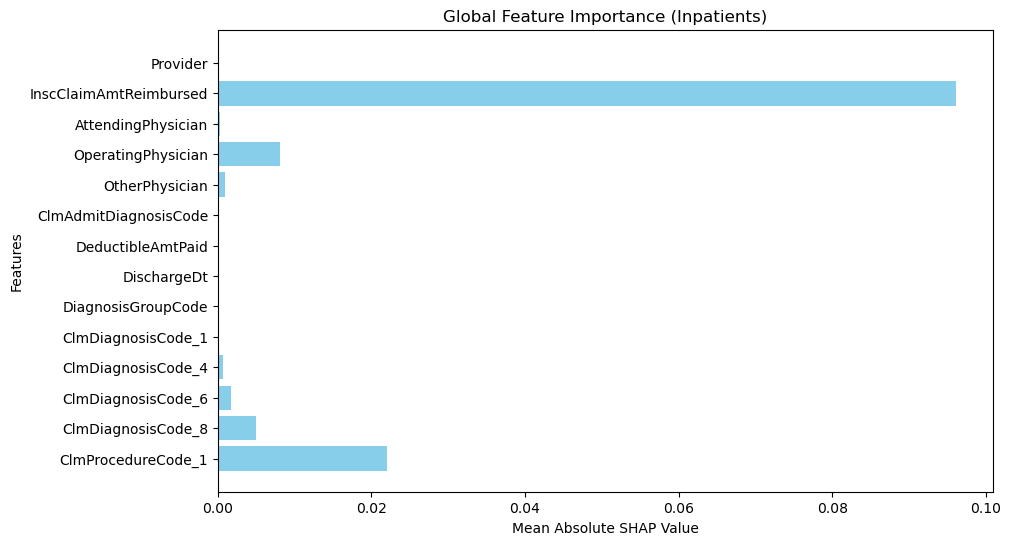

In [115]:
# create a bar chart for global feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_inpatient, shap_metric_aggregated_inpatient, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.title('Global Feature Importance (Inpatients)')
plt.gca().invert_yaxis()  # flip the chart to display the highest importance at the top
plt.show()

##### Dominance of InscClaimAmtReimbursed: The length of the bar for InscClaimAmtReimbursed is significantly longer than all other features. This strongly suggests that the amount reimbursed for the insurance claim is the most influential factor in the model's prediction of fraud in inpatient cases.

##### SHAP Values (Feature Importance) for Out Patients.

In [116]:
# instantiate the TreeExplainer for the outpatient model
explainer = shap.TreeExplainer(rf_model_inpatient)

# calculate SHAP values for the outpatient dataset
# disable additivity check to handle the discrepancy
shap_values_outpatient = explainer.shap_values(X_test_outpatient_1, check_additivity=False)

# check SHAP values and the expected shape
print(f"Shape of SHAP values for outpatient data: {len(shap_values_outpatient)}")
print(f"Shape of X_test_outpatient: {X_test_outpatient_1.shape}")

Shape of SHAP values for outpatient data: 25168
Shape of X_test_outpatient: (25168, 9)


In [117]:
# re-align X_test_outpatient to match the model's feature set
aligned_X_test_outpatient = X_test_outpatient_1.reindex(columns=rf_model_inpatient.feature_names_in_, fill_value=0)

# check the new shape of the test dataset
print(f"Shape of aligned_X_test_outpatient: {aligned_X_test_outpatient.shape}")


Shape of aligned_X_test_outpatient: (25168, 14)


In [118]:
# recalculate SHAP values using the aligned test dataset
shap_values_outpatient = explainer.shap_values(aligned_X_test_outpatient, check_additivity=False)

# verify the shape of the SHAP values
print(f"Shape of SHAP values for outpatient data: {np.array(shap_values_outpatient).shape}")

Shape of SHAP values for outpatient data: (25168, 14, 2)


In [119]:
# calculate the SHAP metric
shap_metric_outpatient = np.mean(np.abs(shap_values_outpatient), axis=0)
print("SHAP metric:", shap_metric_outpatient)

SHAP metric: [[0.00000000e+00 0.00000000e+00]
 [5.41676278e-02 5.41676278e-02]
 [8.97555053e-05 8.97555053e-05]
 [1.78298049e-02 1.78298049e-02]
 [4.70128988e-03 4.70128988e-03]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [8.68587770e-03 8.68587770e-03]
 [1.16721805e-02 1.16721805e-02]
 [7.75173066e-03 7.75173066e-03]
 [5.46475808e-02 5.46475808e-02]]


In [120]:
# aggregate SHAP values by taking the mean across samples
shap_metric_aggregated_outpatient = np.abs(shap_metric_outpatient).mean(axis=1)
print("Shape of aggregated shap_metric:", shap_metric_aggregated_outpatient.shape)


Shape of aggregated shap_metric: (14,)


In [121]:
# Check the length discrepancy
if len(shap_metric_aggregated_outpatient) != len(feature_names_outpatient):
    print("SHAP values and feature names mismatch detected.")

    # Truncate SHAP values if they have extra entries
    print("Truncating SHAP values to align with feature names...")
    shap_metric_aggregated_outpatient = shap_metric_aggregated_outpatient[:len(feature_names_outpatient)]

# Verify alignment after adjustment
print(f"Adjusted SHAP values count: {len(shap_metric_aggregated_outpatient)}")
print(f"Feature names count: {len(feature_names_outpatient)}")

# Sort features by their aggregated importance
sorted_indices = np.argsort(-shap_metric_aggregated_outpatient)
most_important_features_outpatient = np.array(feature_names_outpatient)[sorted_indices]

# Print most important features
print("Most important features:")
for feature in most_important_features_outpatient:
    print(feature)


SHAP values and feature names mismatch detected.
Truncating SHAP values to align with feature names...
Adjusted SHAP values count: 9
Feature names count: 9
Most important features:
InscClaimAmtReimbursed
OperatingPhysician
OtherPhysician
AttendingPhysician
Provider
ClmDiagnosisCode_2
ClmDiagnosisCode_4
DeductibleAmtPaid
ClmAdmitDiagnosisCode


In [122]:
# Display SHAP values alongside feature names for validation
print("Feature names and corresponding SHAP values:")
for feature, shap_value in zip(feature_names_outpatient, shap_metric_aggregated_outpatient):
    print(f"{feature}: {shap_value}")


Feature names and corresponding SHAP values:
Provider: 0.0
InscClaimAmtReimbursed: 0.05416762779826268
AttendingPhysician: 8.975550527343546e-05
OperatingPhysician: 0.01782980486735385
OtherPhysician: 0.004701289880396705
ClmDiagnosisCode_2: 0.0
ClmDiagnosisCode_4: 0.0
DeductibleAmtPaid: 0.0
ClmAdmitDiagnosisCode: 0.0


In [123]:
# sort features by their aggregated importance
most_important_features_outpatient = feature_names_outpatient[np.argsort(-shap_metric_aggregated_outpatient)]
print("Most important features:")
for feature in most_important_features_outpatient:
    print(feature)

Most important features:
InscClaimAmtReimbursed
OperatingPhysician
OtherPhysician
AttendingPhysician
Provider
ClmDiagnosisCode_2
ClmDiagnosisCode_4
DeductibleAmtPaid
ClmAdmitDiagnosisCode


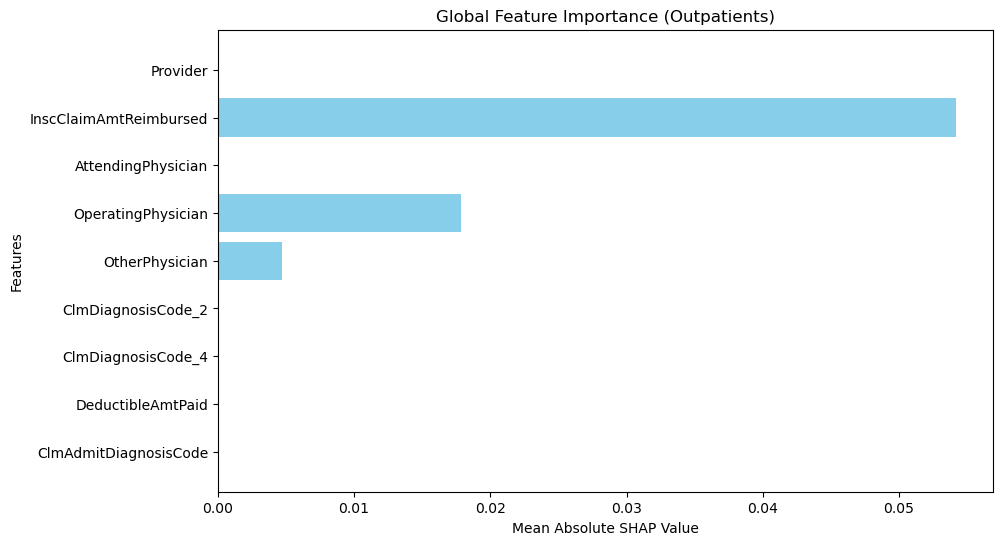

In [124]:
# create a bar chart for global feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_outpatient, shap_metric_aggregated_outpatient, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.title('Global Feature Importance (Outpatients)')
plt.gca().invert_yaxis()  # flip the chart to display the highest importance at the top
plt.show()

##### Dominance of InscClaimAmtReimbursed: Similar to the inpatient model, InscClaimAmtReimbursed stands out as the most influential feature. This emphasizes that the amount reimbursed by insurance is a crucial factor in determining fraud risk for both inpatient and outpatient claims.


***

#### Final Summary and Insights on Fraudulent Provider Prediction Project

##### The goal of this project was to predict potentially fraudulent providers based on insurance claims and identify key variables indicative of fraud patterns. The analysis utilized various datasets and statistical/machine learning techniques to uncover fraud patterns, assess model performance, and extract actionable insights. Below are the key findings and conclusions:

##### 1. Beneficiary Demographics
* The dataset revealed a skew in gender distribution, with more male beneficiaries (36,721) than female beneficiaries (27,247).<br>
* Analysis of death ages showed no specific pattern and a uniform distribution, with an average age of 74 years.<br>
* Race distribution showed the majority as race category 1 (54,105 beneficiaries), followed by smaller proportions in other categories.<br>
* State and county-level distributions highlighted potential geographic concentrations of claims, which could be explored further for anomalies.

##### 2. Claims and Reimbursement Patterns
* Outliers Detected: Scatter plots of annual reimbursements showed outliers, with a few cases of unusually high reimbursements. These may represent fraudulent claims or legitimate but exceptional cases requiring further investigation.
* Reimbursement Dominance: For both inpatient and outpatient data, the reimbursement amounts were significantly higher than deductible amounts, aligning with the expectation that insurers cover the majority of healthcare costs. However, outliers in reimbursement require scrutiny.

##### 3. Diagnosis and Procedure Insights
* Diagnosis codes followed a typical healthcare distribution where most codes had few beneficiaries, but a few codes dominated.
* Specific diagnosis codes like ClmDiagnosisCode_2 and ClmDiagnosisCode_4 were highly correlated with high reimbursement amounts, suggesting a strong link between these diagnoses and potential fraud.
* Procedure codes showed weaker correlations, but certain combinations of diagnosis and physician variables flagged notable patterns.


##### 4. Fraud Detection Using Machine Learning
* The RandomForestClassifier model demonstrated high predictive power, particularly for inpatient data:
* - Inpatient Metrics:
* Accuracy, Precision, Recall, F1 Score: All achieved a perfect 1.00, indicating flawless detection of fraudulent providers.
* The absence of false positives and negatives underscores the reliability of the model for inpatient data.
* - 4.2 Outpatient Metrics:
* Precision, Recall, and F1 Score were 0.70, reflecting solid performance but room for improvement in detecting outpatient fraud.
False positives and negatives in outpatient predictions indicate a need for further tuning.

##### 5. Key Features for Fraud Detection
* Feature importance analysis revealed that InscClaimAmtReimbursed was the most influential variable for predicting fraudulent claims.
* Physician involvement (AttendingPhysician, OperatingPhysician) and certain diagnosis codes played crucial roles in identifying potential fraud.
* Correlations showed that combinations of diagnosis and physician data provide valuable fraud indicators.


##### 6. Fraud Patterns and Recommendations
* High-Reimbursement Claims: Outliers in reimbursement amounts often correlate with fraudulent claims. These should be prioritized for review.
* Diagnosis Code Clustering: Common diagnosis codes with high reimbursements or strong interrelations should be monitored.
* Model Enhancement: Outpatient fraud detection could be improved by exploring additional features or adjusting thresholds to reduce false positives and negatives.

#### Conclusion
#### The project successfully achieved its objectives by identifying fraudulent patterns and key indicators of fraud in provider claims. The models exhibited strong predictive power, particularly for inpatient data. Insights from feature importance and reimbursement patterns offer valuable direction for healthcare fraud investigations. Further enhancements to the model, particularly for outpatient claims, and the integration of additional data sources could bolster fraud detection capabilities, leading to significant cost savings and improved healthcare system integrity.

***